# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# TODO: Fill this in based on where you saved the training and testing data
    
raw_X_train, raw_y_train = train['features'], train['labels']
raw_X_valid, raw_y_valid = valid['features'], valid['labels']
raw_X_test, raw_y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
import numpy as np

n_train = raw_X_train.shape[0]

# TODO: Number of validation examples
n_validation = raw_X_valid.shape[0]

# TODO: Number of testing examples.
n_test = raw_X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = raw_X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
classes = np.unique(raw_y_train)
n_classes = classes.shape[0]

group = {}
for i, item in enumerate(raw_y_train):
    if item not in group:
        group[item] = []
    group[item].append(i)

print("Number of training examples =", n_train)
print(n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualize Class Count

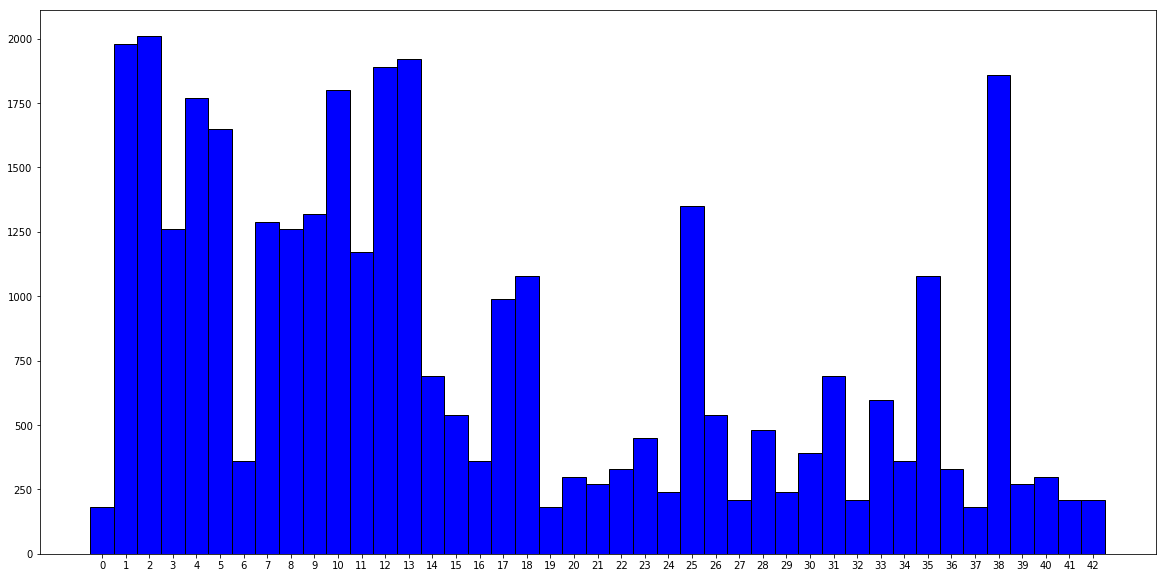

In [4]:
width = 1
x = range(43)
y = []
for i in range(n_classes):
    y.append(len(group[i]))
fig = plt.figure(figsize=(20, 10))
plt.bar(x, y, width, color="blue", align='center', edgecolor='black')
plt.xticks(x)
plt.show()

### Show RGB Image & Gray Image

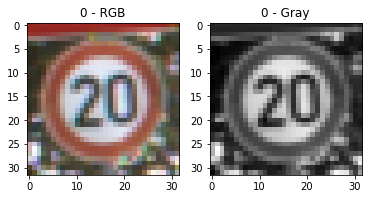

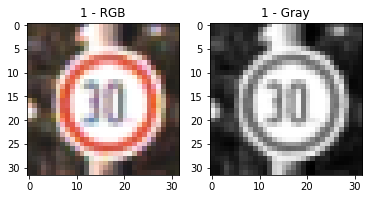

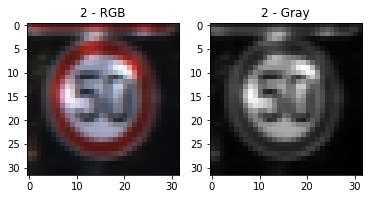

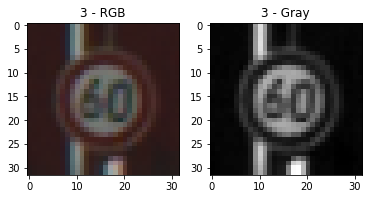

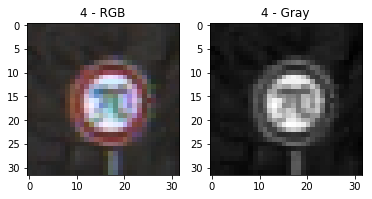

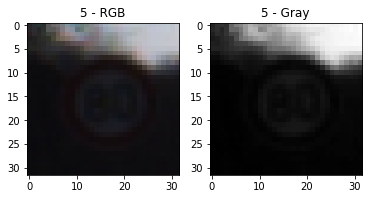

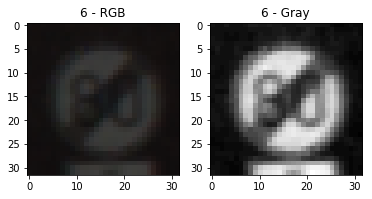

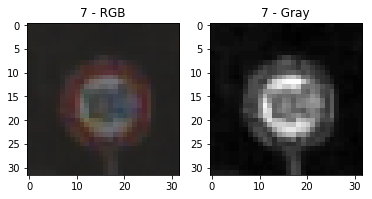

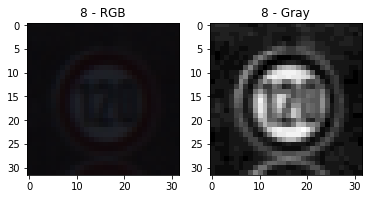

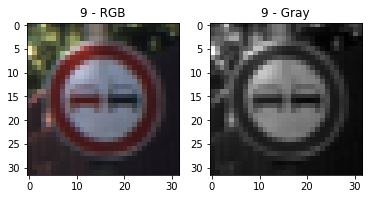

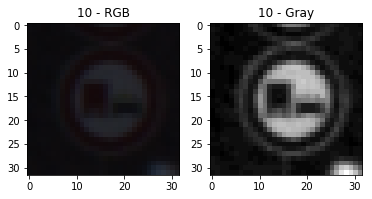

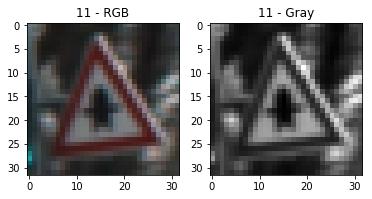

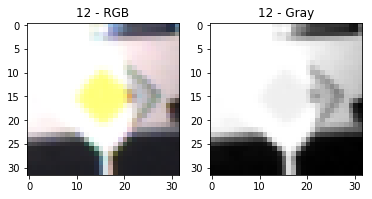

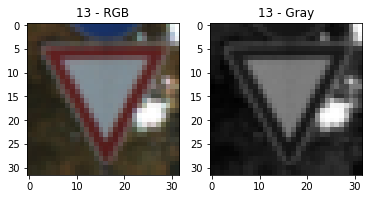

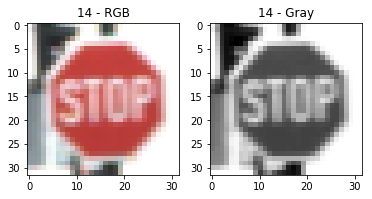

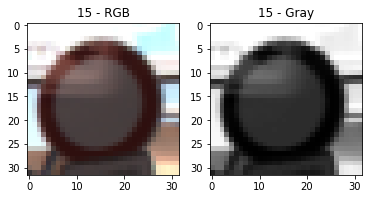

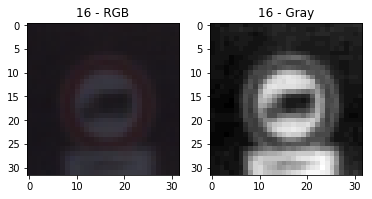

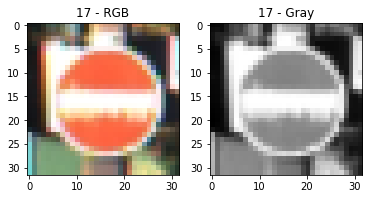

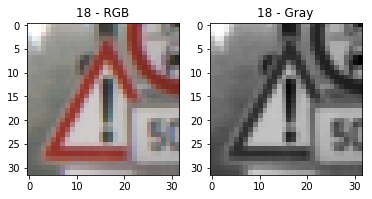

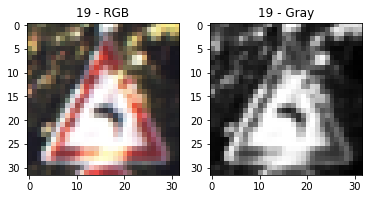

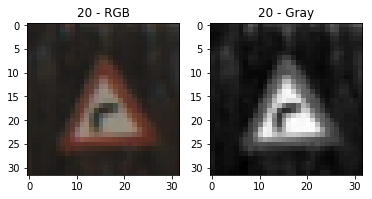

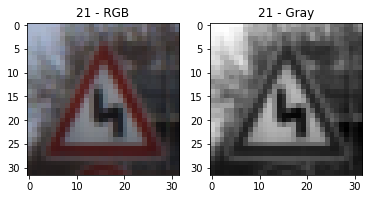

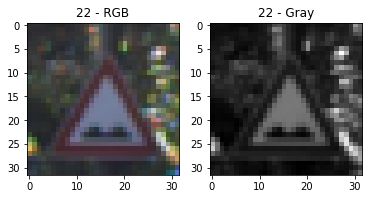

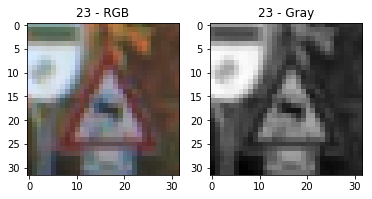

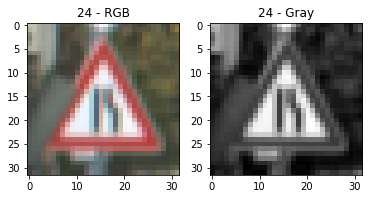

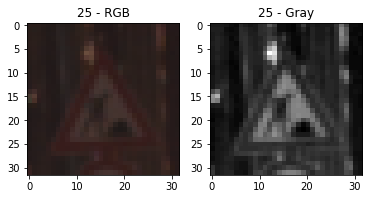

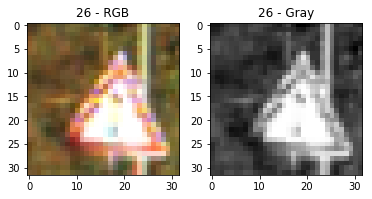

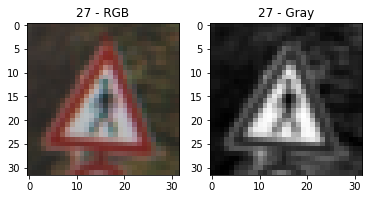

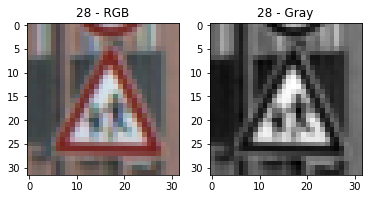

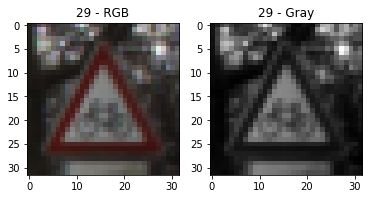

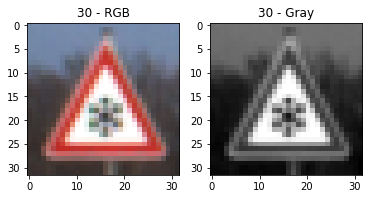

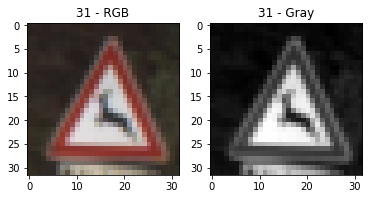

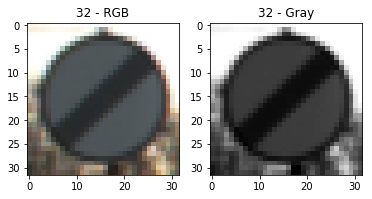

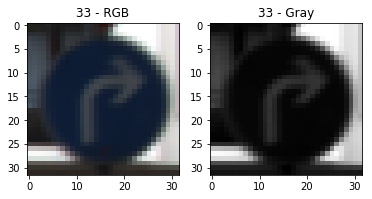

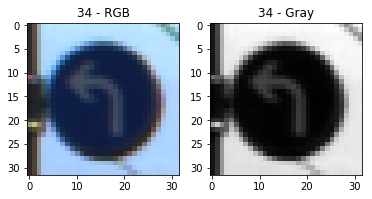

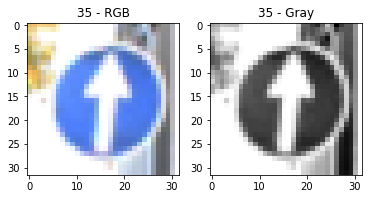

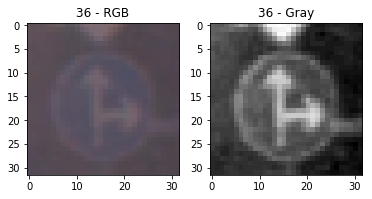

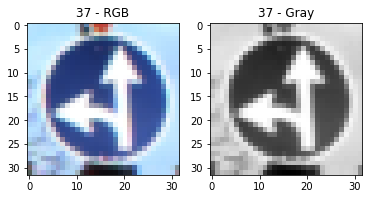

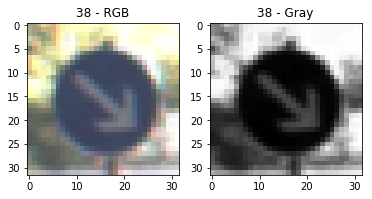

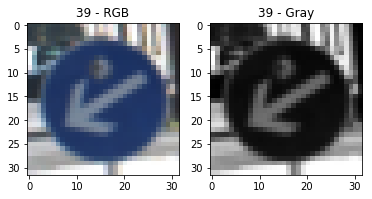

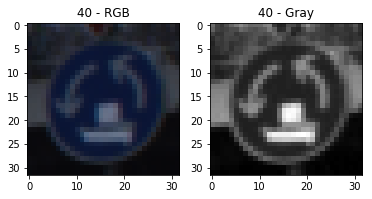

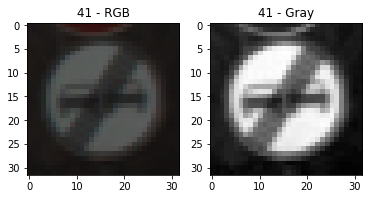

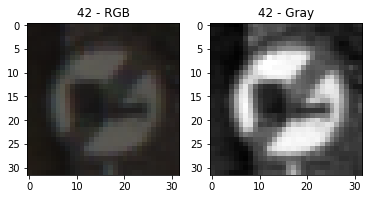

In [5]:
for key, indexes in group.items():
    fig, axs = plt.subplots(1, 2)
    axs = axs.ravel()
    i = random.sample(indexes, 1)[0]
    axs[0].set_title("{} - RGB".format(key, len(indexes)))
    axs[0].imshow(raw_X_train[i])

    axs[1].set_title("{} - Gray".format(key, len(indexes)))
    axs[1].imshow(cv2.cvtColor(raw_X_train[i], cv2.COLOR_RGB2GRAY).reshape([image_shape[0], image_shape[1]]), cmap='gray')
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def preprocess_label(labels):
    """One hot encode label"""
    return np.eye(n_classes)[labels]


def preprocess_img(data):
    """Convert RGB image to Gray image and cast to uint8.
    I put normalization to network input because memory limitation"""
    new_data = []
    for img in data:
        new_data.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).reshape([image_shape[0], image_shape[1], 1]))
    return np.array(new_data).astype(np.uint8)


def rotate(img, degree):
    """Rotate image"""
    (h, w) = img.shape[:2]
    center = (int(w / 2), int(h / 2))
    M = cv2.getRotationMatrix2D(center, degree, 1.0)
    return cv2.warpAffine(img, M, (w, h))


def oversampling(group, data, label):
    """Oversample less size class to same as highest size class"""
    max_v = 0
    for key, indexes in group.items():
        if len(indexes) > max_v:
            max_v = len(indexes)
            
    new_data = []
    new_label = []
    for key, indexes in group.items():
        times = max(round(max_v / len(indexes)), 1)
        for i in range(times):
            new_data.append(np.copy(data[indexes]))
            new_label.append(np.copy(label[indexes]))
    return np.vstack(new_data), np.vstack(new_label)


def random_aug(data):
    """Randomly roate and adjust contrast of image"""
    new_data = []
    for img in data:
        rotate_img = rotate(img, random.randrange(-15, 15))
        new_data.append(rotate_img.reshape([image_shape[0], image_shape[1], 1]))
    return np.array(new_data)


X_train = preprocess_img(raw_X_train)
X_valid = preprocess_img(raw_X_valid)
X_test = preprocess_img(raw_X_test)
y_train = preprocess_label(raw_y_train)
y_valid = preprocess_label(raw_y_valid)
y_test = preprocess_label(raw_y_test)


# Augment
X_train_aug = random_aug(X_train)
y_train_aug = y_train
# Over sampling
X_train_over, y_train_over = oversampling(group, X_train, y_train)
# Over sampling + Augment
X_train_over_aug = random_aug(X_train_over)
y_train_over_aug = y_train_over

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [8]:
import abc
import tensorflow as tf

#### CNN Abstract Class

In [9]:
class CNN(abc.ABC):
    """Abstract class for convolutional neural network classifier
    """
    def __init__(self, img_shape, n_classes, w_stddev=0.1, b_init=0.01):
        self._img_shape = img_shape
        self._n_classes = n_classes
        self._w_stddev = w_stddev
        self._b_init = b_init
        
        self.holders = {}
        self.vars = {}
        self.ops = {}
        # Reset tensorflow graph if it exists
        tf.reset_default_graph()
        # Construct new graph
        self._init_placeholder()
        self.ops['y'] = self._build_net()
        self.ops['y_softmax'] = tf.nn.softmax(self.ops['y'])
        self.ops['loss'] = self._build_loss()
        self.ops['optimizer'] = self._build_optimizer()
        # Create tensorflow saver
        self._saver = tf.train.Saver()
        # Initialize
        init = tf.global_variables_initializer()
        self._sess = tf.Session()
        self._sess.run(init)
        
    def _init_placeholder(self):
        """Init placeholder for x, y, learning rate and keep probability"""
        self.holders['x'] = tf.placeholder(
            dtype=tf.float32,
            shape=[None, self._img_shape[0], self._img_shape[1], self._img_shape[2]]
        )
        self.holders['y'] = tf.placeholder(
            dtype=tf.int32,
            shape=[None, self._n_classes]
        )
        self.holders['keep_prob'] = tf.placeholder(tf.float32)
        self.holders['lr_rate'] = tf.placeholder(tf.float32)
        
    @abc.abstractmethod
    def _build_net(self):
        pass  
        
    def _build_loss(self):
        # Cross Entropy
        self.ops['cross_entropy'] = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                labels=self.holders['y'], logits=self.ops['y']
            )
        )
        return self.ops['cross_entropy']
    
    def _build_optimizer(self):
        return tf.train.AdamOptimizer(learning_rate=self.holders['lr_rate']).minimize(self.ops['loss'])
        
    def train(self, x, y, lr_rate=1e-2, keep_prob=1.0):
        self._sess.run(
            self.ops['optimizer'], feed_dict={
                self.holders['x']: x,
                self.holders['y']: y,
                self.holders['keep_prob']: keep_prob,
                self.holders['lr_rate']: lr_rate,
            }
        )
        
    def predict(self, x, keep_prob=1.0):
        return self._sess.run(
            self.ops['y_softmax'], feed_dict={
                self.holders['x']: x,
                self.holders['keep_prob']: keep_prob,
            }
        )
    
    def save(self, path):
        self._saver.save(self._sess, path)
        
    def load(self, path):
        self._saver.restore(self._sess, path)

#### LeNet5

In [10]:
class LeNet5(CNN):
    
    def _build_net(self):
        c_strides = [1, 1, 1, 1]
        p_ksize = [1, 2, 2, 1]
        p_strides = p_ksize
    
        # Conv layer 1
        self.vars['conv1_w'] = tf.Variable(
            tf.truncated_normal([5, 5, self._img_shape[2], 6], stddev=self._w_stddev)
        )
        self.vars['conv1_b'] = tf.Variable(tf.constant(self._b_init, shape=[6]))
        self.ops['conv1'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                (self.holders['x'] - 128.0) / 128.0,
                self.vars['conv1_w'],
                strides=c_strides,
                padding='VALID'
            ) + self.vars['conv1_b']
        )

        # Conv layer 2
        self.ops['conv2'] = tf.nn.max_pool(
            self.ops['conv1'], ksize=p_ksize, strides=p_strides, padding='SAME'
        )
        
        # Conv layer 2
        self.vars['conv3_w'] = tf.Variable(
            tf.truncated_normal([5, 5, 6, 16], stddev=self._w_stddev)
        )
        self.vars['conv3_b'] = tf.Variable(tf.constant(self._b_init, shape=[16]))
        self.ops['conv3'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                self.ops['conv2'],
                self.vars['conv3_w'],
                strides=c_strides,
                padding='VALID'
            ) + self.vars['conv3_b']
        )
        
        # Conv layer 4
        self.ops['conv4'] = tf.nn.max_pool(
            self.ops['conv3'], ksize=p_ksize, strides=p_strides, padding='SAME'
        )

        # Conv layer5
        self.vars['conv5_w'] = tf.Variable(
            tf.truncated_normal([5, 5, 16, 120], stddev=self._w_stddev)
        )
        self.vars['conv5_b'] = tf.Variable(tf.constant(self._b_init, shape=[120]))
        self.ops['conv5'] = tf.nn.dropout(
            tf.nn.leaky_relu(
                tf.nn.conv2d(
                    self.ops['conv4'], self.vars['conv5_w'], strides=c_strides, padding='SAME'
                ) + self.vars['conv5_b']
            ),
            keep_prob=self.holders['keep_prob']
        )

        # Flatten
        flat_dim = 1
        for d in self.ops['conv5'].shape.as_list()[1:]:
            flat_dim *= d
        self.ops['h_flat'] = tf.reshape(self.ops['conv5'], [-1, flat_dim])

        # Fully connected 1
        self.vars['fc1_w'] = tf.Variable(
            tf.truncated_normal([flat_dim, self._n_classes], stddev=self._w_stddev)
        )
        self.vars['fc1_b'] = tf.Variable(tf.constant(self._b_init, shape=[self._n_classes]))
        self.ops['fc1'] = tf.matmul(self.ops['h_flat'], self.vars['fc1_w']) + self.vars['fc1_b']

        return self.ops['fc1']

#### MyCNN

In [11]:
class MyCNN(CNN):
        
    def _build_net(self):
        c_strides = [1, 1, 1, 1]
        p_ksize = [1, 2, 2, 1]
        p_strides = p_ksize
    
        # Layer 1: conv
        self.vars['conv1_w'] = tf.Variable(
            tf.truncated_normal([3, 3, self._img_shape[2], 16], stddev=self._w_stddev)
        )
        self.vars['conv1_b'] = tf.Variable(tf.constant(self._b_init, shape=[16]))
        self.ops['conv1'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                (self.holders['x'] - 128.0) / 128.0, self.vars['conv1_w'], strides=c_strides, padding='SAME'
            ) + self.vars['conv1_b']
        )

        # Layer 2: conv
        self.vars['conv2_w'] = tf.Variable(
            tf.truncated_normal([3, 3, 16, 16], stddev=self._w_stddev)
        )
        self.vars['conv2_b'] = tf.Variable(tf.constant(self._b_init, shape=[16]))
        self.ops['conv2'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                self.ops['conv1'], self.vars['conv2_w'], strides=c_strides, padding='SAME'
            ) + self.vars['conv2_b']
        )
        
        # Layer 3: pool
        self.ops['conv3'] = tf.nn.max_pool(
            self.ops['conv2'], ksize=p_ksize, strides=p_strides, padding='SAME'
        )

        # Layer4: conv
        self.vars['conv4_w'] = tf.Variable(
            tf.truncated_normal([3, 3, 16, 32], stddev=self._w_stddev)
        )
        self.vars['conv4_b'] = tf.Variable(tf.constant(self._b_init, shape=[32]))
        self.ops['conv4'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                self.ops['conv3'], self.vars['conv4_w'], strides=c_strides, padding='SAME'
            ) + self.vars['conv4_b']
        )
        
        # Layer5: pool
        self.ops['conv5'] = tf.nn.max_pool(
            self.ops['conv4'], ksize=p_ksize, strides=p_strides, padding='SAME'
        )

        # Layer6: conv
        self.vars['conv6_w'] = tf.Variable(
            tf.truncated_normal([3, 3, 32, 64], stddev=self._w_stddev)
        )
        self.vars['conv6_b'] = tf.Variable(tf.constant(self._b_init, shape=[64]))
        self.ops['conv6'] = tf.nn.leaky_relu(
            tf.nn.conv2d(
                self.ops['conv5'], self.vars['conv6_w'], strides=c_strides, padding='SAME'
            ) + self.vars['conv6_b']
        )
        
        # Layer7: pool
        self.ops['conv7'] = tf.nn.dropout(
            tf.nn.max_pool(
                self.ops['conv6'], ksize=p_ksize, strides=p_strides, padding='SAME'
            ),
            keep_prob=self.holders['keep_prob']
        )

        # Flatten
        flat_dim = 1
        for d in self.ops['conv7'].shape.as_list()[1:]:
            flat_dim *= d
        self.ops['h_flat'] = tf.reshape(self.ops['conv7'], [-1, flat_dim])

        # Fully connected 1
        self.vars['fc1_w'] = tf.Variable(
            tf.truncated_normal([flat_dim, self._n_classes], stddev=self._w_stddev)
        )
        self.vars['fc1_b'] = tf.Variable(tf.constant(self._b_init, shape=[self._n_classes]))
        self.ops['fc1'] = tf.matmul(self.ops['h_flat'], self.vars['fc1_w']) + self.vars['fc1_b']

        return self.ops['fc1']
        
    def _build_loss(self):
        # Cross Entropy
        self.ops['cross_entropy'] = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=self.holders['y'], logits=self.ops['y'])
        )
        # Regularization
        self.ops['l2_reg'] = tf.nn.l2_loss(self.vars['fc1_w'])
        self.ops['l1_reg'] = tf.reduce_mean(tf.abs(self.ops['conv1'])) + \
            tf.reduce_mean(tf.abs(self.ops['conv2'])) + \
            tf.reduce_mean(tf.abs(self.ops['conv4'])) + \
            tf.reduce_mean(tf.abs(self.ops['conv6']))
        # Loss
        return self.ops['cross_entropy'] + 1e-1 * self.ops['l1_reg'] + 1e-2 * self.ops['l2_reg']

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [13]:
import itertools
from sklearn.metrics import confusion_matrix


def shuffle(indexes):
    """Randomly shuffle data order"""
    return random.sample(indexes, len(indexes))


def cal_acc(model, X, y):
    count = 0
    num = 0
    for i in range(0, X.shape[0], 32):
        predict_y = model.predict(x=X[i:i + 32])
        count += sum(np.equal(np.argmax(y[i:i + 32], 1), np.argmax(predict_y, 1)).astype(np.float32))
        num += predict_y.shape[0]
    return count / num


def train(model, train_data, train_label, indexes, epochs=50, lr_rate=1e-2, batch_size=128, keep_prob=1.0):
    train_accs = []
    valid_accs = []
    test_accs = []
    for epoch_i in range(epochs):
        # Train epoch
        for i in range(0, len(indexes), batch_size):
            batch_index = indexes[i:i + batch_size] 
            model.train(
                x=train_data[batch_index],
                y=train_label[batch_index],
                lr_rate=lr_rate,
                keep_prob=keep_prob
            )
        # Store result
        train_accs.append(cal_acc(model, X_train, y_train))
        valid_accs.append(cal_acc(model, X_valid, y_valid))
        test_accs.append(cal_acc(model, X_test, y_test))
        print("Epoch {} - Train: {:.4f}, Valid: {:.4f}, Test: {:.4f}".format(
            epoch_i, train_accs[-1], valid_accs[-1], test_accs[-1]
        ))
        # Decay learning rate
        lr_rate *= 0.9
    return train_accs, valid_accs, test_accs
    

def show_acc(train_acc, valid_acc, test_acc, name):
    """Plot accuracy line chart for training, validation and test results"""
    x = range(1, len(train_acc) + 1)
    fig = plt.figure(figsize=(15, 10))
    plt.plot(x, train_acc, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=4, label="Train")
    plt.plot(x, valid_acc, marker='o', markerfacecolor='green', markersize=10, color='yellowgreen', linewidth=4, label="Valid")
    plt.plot(x, test_acc, marker='o', markerfacecolor='red', markersize=10, color='tomato', linewidth=4, label="Test")
    plt.grid(linestyle='-', linewidth='0.5', color='gray')
    plt.legend()
    plt.title("{} Accuracy Result".format(name))
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.yticks([0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
    plt.show()


def show_cm(X, y, name):
    """Plot confusion matrix"""
    result = []
    for i in range(0, X.shape[0], 32):
        predict_result = model.predict(x=X[i:i + 32])
        result.extend(predict_result)
    cm = confusion_matrix(np.argmax(y, 1), np.argmax(result, 1))
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("{} Confusion Matrix".format(name))
    plt.xlabel("Predicted")
    plt.ylabel("Label")
    plt.xticks(range(n_classes), rotation=45)
    plt.yticks(range(n_classes))
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j], horizontalalignment="center",
            color="black" if cm[i, j] > 0 else "white"
        )
    plt.show()

In [14]:
# Randomly shuffle data
indexes = shuffle(list(range(X_train.shape[0])))
over_indexes = shuffle(list(range(X_train_over.shape[0])))

### Raw Training Experiments

#### LeNet5

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch 0 - Train: 0.9444, Valid: 0.8889, Test: 0.8532
Epoch 1 - Train: 0.9611, Valid: 0.8977, Test: 0.8764
Epoch 2 - Train: 0.9638, Valid: 0.9036, Test: 0.8814
Epoch 3 - Train: 0.9684, Valid: 0.9054, Test: 0.8945
Epoch 4 - Train: 0.9796, Valid: 0.9220, Test: 0.8905
Epoch 5 - Train: 0.9754, Valid: 0.9068, Test: 0.8978
Epoch 6 - Train: 0.9937, Valid: 0.9345, Test: 0.9188
Epoch 7 - Train: 0.9883, Valid: 0.9213, Test: 0.9115
Epoch 8 - Train: 0.9953, Valid: 0.9481, Test: 0.9173
Epoch 9 - Train: 0.9956, Valid: 0.9415, Test: 0.9241
Epoch 10 - Train: 0.9959, Valid: 0.9429, Test: 0.9231
Epoch 11 - Train: 0.9957, Valid: 0.9363, Test: 0.9192
Epoch 12 - Train: 0.9943, Valid: 0.9295, Test: 0.9158
Epoch 13 - Train: 0.9990, Valid: 0.9535, Test: 0.9352
Epoch 14 - Train: 0.9996, Valid: 0.9562, Test: 0.9356
Epoch 15

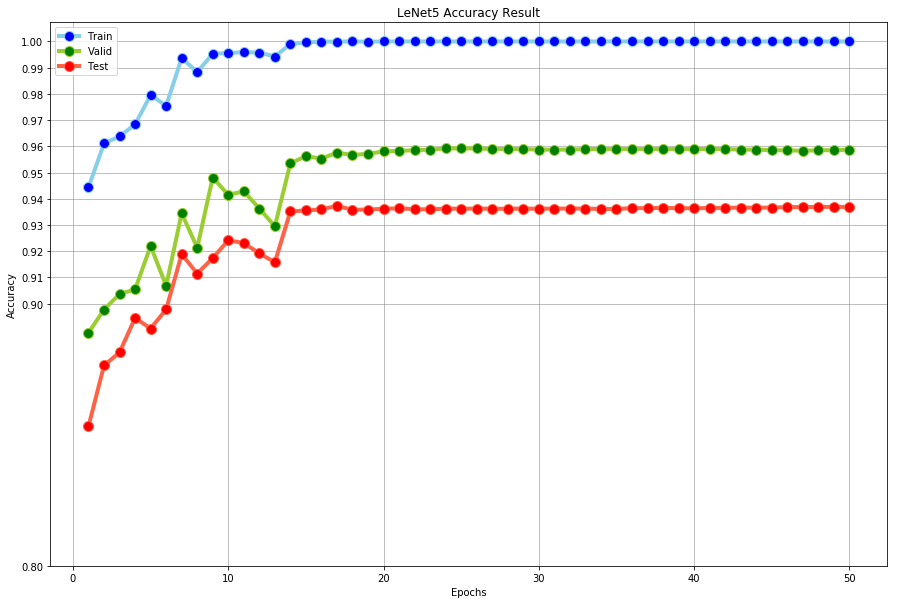

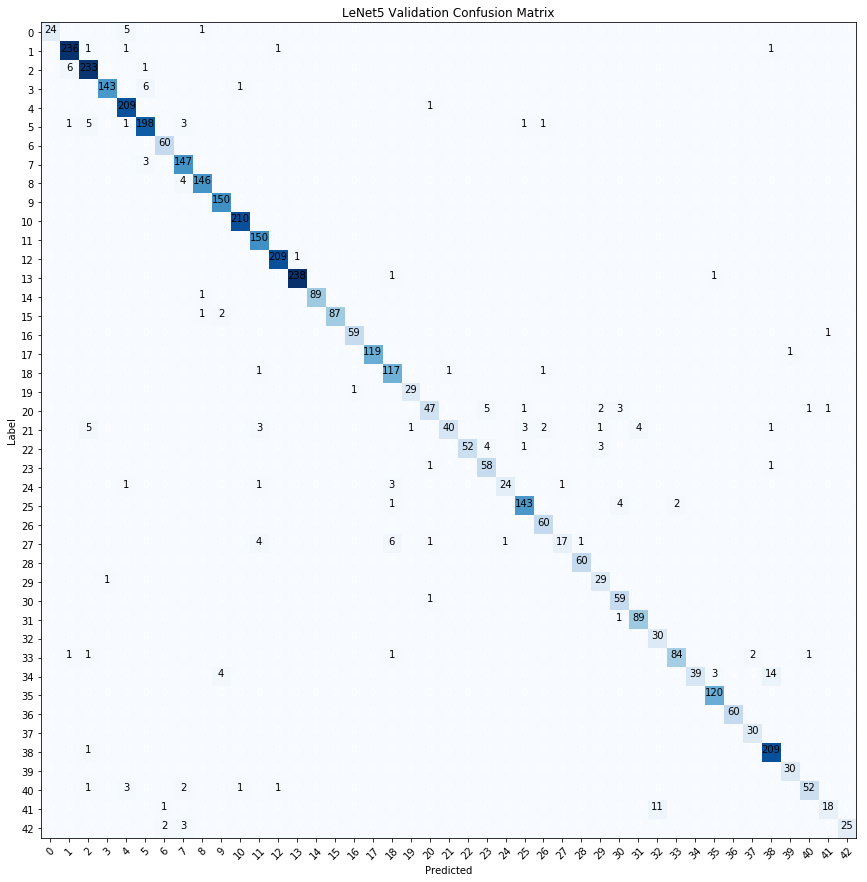

In [15]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train, y_train, indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "LeNet5")
show_cm(X_valid, y_valid, "LeNet5 Validation")
model.save("models/LeNet5.ckpt")

#### LeNet5 - Dropout

Epoch 0 - Train: 0.9545, Valid: 0.8735, Test: 0.8671
Epoch 1 - Train: 0.9757, Valid: 0.9054, Test: 0.8901
Epoch 2 - Train: 0.9460, Valid: 0.8741, Test: 0.8704
Epoch 3 - Train: 0.9837, Valid: 0.9297, Test: 0.9131
Epoch 4 - Train: 0.9860, Valid: 0.9313, Test: 0.9205
Epoch 5 - Train: 0.9885, Valid: 0.9331, Test: 0.9227
Epoch 6 - Train: 0.9868, Valid: 0.9451, Test: 0.9203
Epoch 7 - Train: 0.9954, Valid: 0.9449, Test: 0.9378
Epoch 8 - Train: 0.9959, Valid: 0.9474, Test: 0.9324
Epoch 9 - Train: 0.9957, Valid: 0.9494, Test: 0.9361
Epoch 10 - Train: 0.9983, Valid: 0.9590, Test: 0.9482
Epoch 11 - Train: 0.9946, Valid: 0.9458, Test: 0.9292
Epoch 12 - Train: 0.9969, Valid: 0.9531, Test: 0.9405
Epoch 13 - Train: 0.9985, Valid: 0.9585, Test: 0.9420
Epoch 14 - Train: 0.9949, Valid: 0.9433, Test: 0.9311
Epoch 15 - Train: 0.9992, Valid: 0.9642, Test: 0.9445
Epoch 16 - Train: 0.9994, Valid: 0.9605, Test: 0.9441
Epoch 17 - Train: 0.9996, Valid: 0.9655, Test: 0.9448
Epoch 18 - Train: 0.9995, Valid: 0.968

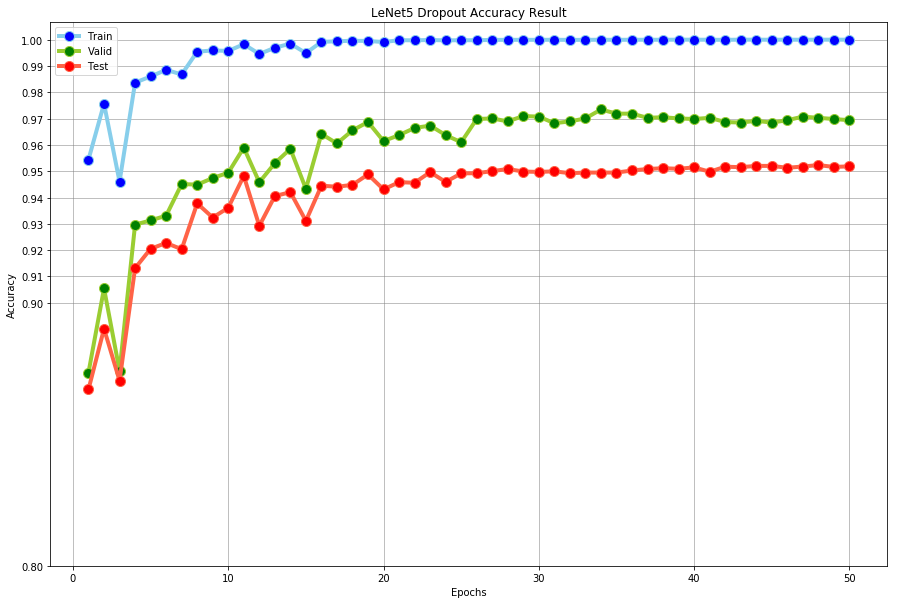

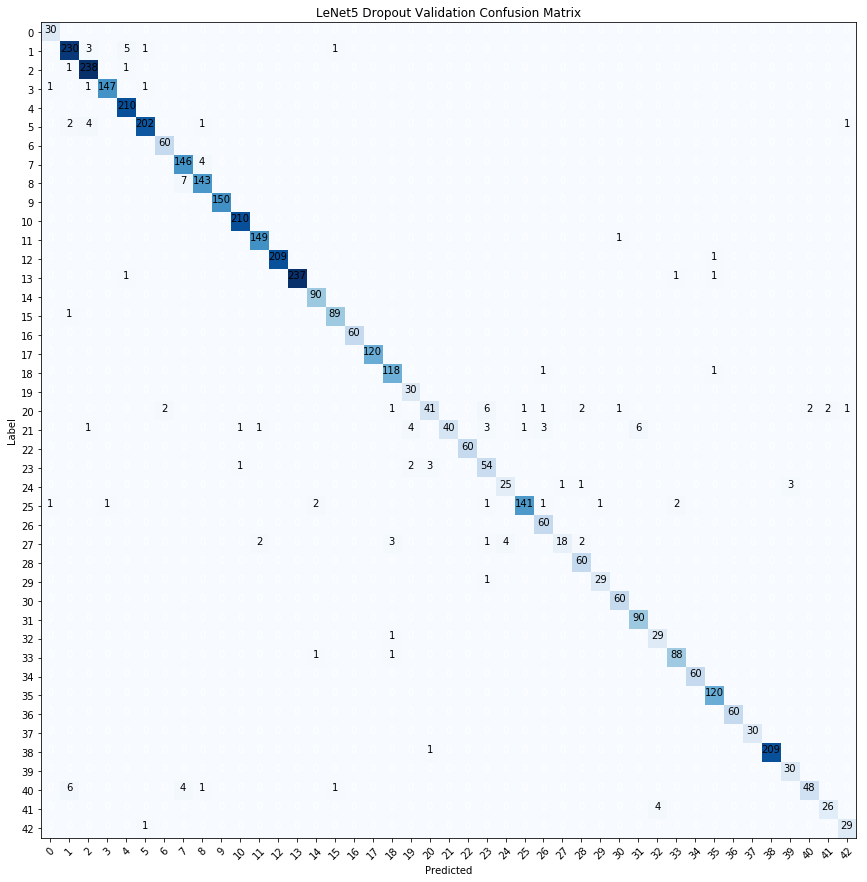

In [16]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train, y_train, indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "LeNet5 Dropout")
show_cm(X_valid, y_valid, "LeNet5 Dropout Validation")
model.save("models/LeNet5_dropout.ckpt")

#### MyCNN

Epoch 0 - Train: 0.9591, Valid: 0.8889, Test: 0.8961
Epoch 1 - Train: 0.9777, Valid: 0.9156, Test: 0.9184
Epoch 2 - Train: 0.9871, Valid: 0.9420, Test: 0.9333
Epoch 3 - Train: 0.9931, Valid: 0.9612, Test: 0.9504
Epoch 4 - Train: 0.9928, Valid: 0.9567, Test: 0.9558
Epoch 5 - Train: 0.9971, Valid: 0.9757, Test: 0.9661
Epoch 6 - Train: 0.9955, Valid: 0.9678, Test: 0.9603
Epoch 7 - Train: 0.9972, Valid: 0.9739, Test: 0.9697
Epoch 8 - Train: 0.9970, Valid: 0.9769, Test: 0.9664
Epoch 9 - Train: 0.9970, Valid: 0.9723, Test: 0.9685
Epoch 10 - Train: 0.9982, Valid: 0.9773, Test: 0.9690
Epoch 11 - Train: 0.9983, Valid: 0.9776, Test: 0.9685
Epoch 12 - Train: 0.9981, Valid: 0.9778, Test: 0.9697
Epoch 13 - Train: 0.9982, Valid: 0.9821, Test: 0.9686
Epoch 14 - Train: 0.9988, Valid: 0.9814, Test: 0.9696
Epoch 15 - Train: 0.9990, Valid: 0.9812, Test: 0.9710
Epoch 16 - Train: 0.9993, Valid: 0.9810, Test: 0.9742
Epoch 17 - Train: 0.9995, Valid: 0.9807, Test: 0.9739
Epoch 18 - Train: 0.9995, Valid: 0.980

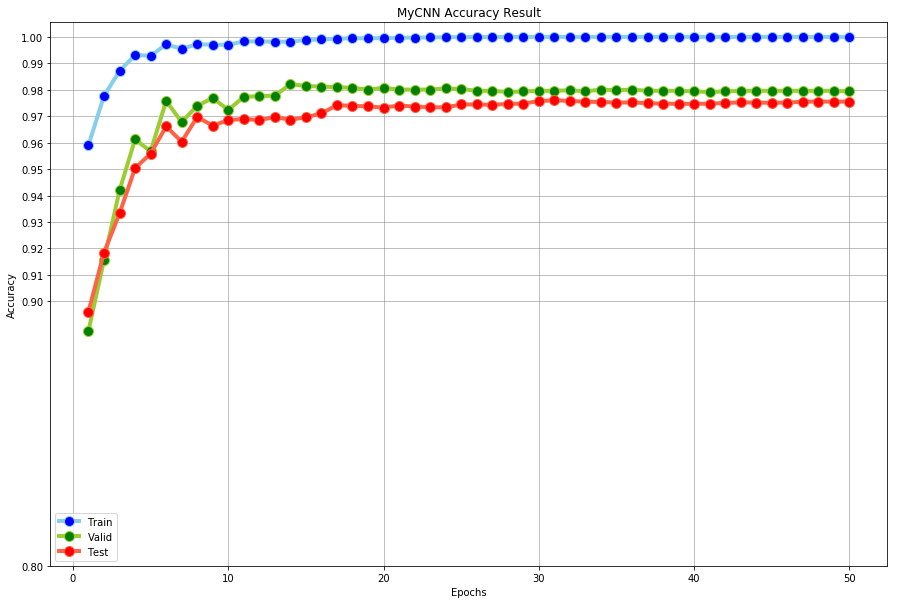

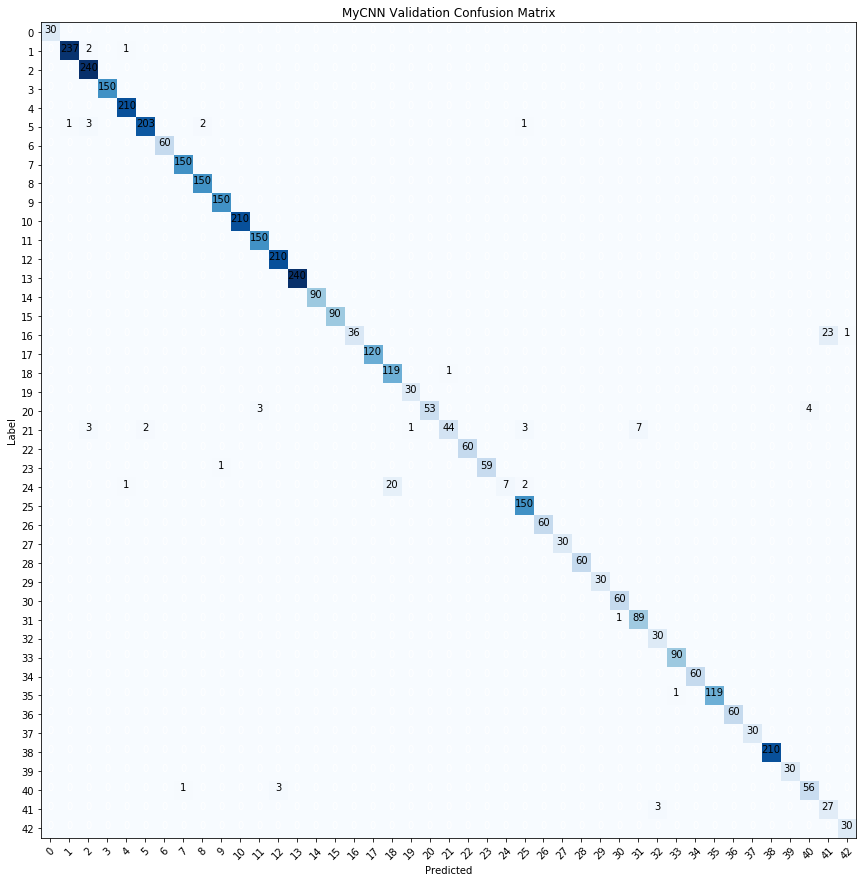

In [17]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train, y_train, indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "MyCNN")
show_cm(X_valid, y_valid, "MyCNN Validation")
model.save("models/MyCNN.ckpt")

#### MyCNN - Dropout

Epoch 0 - Train: 0.9655, Valid: 0.9091, Test: 0.9062
Epoch 1 - Train: 0.9872, Valid: 0.9431, Test: 0.9450
Epoch 2 - Train: 0.9860, Valid: 0.9433, Test: 0.9500
Epoch 3 - Train: 0.9926, Valid: 0.9721, Test: 0.9614
Epoch 4 - Train: 0.9941, Valid: 0.9705, Test: 0.9600
Epoch 5 - Train: 0.9965, Valid: 0.9823, Test: 0.9709
Epoch 6 - Train: 0.9972, Valid: 0.9732, Test: 0.9721
Epoch 7 - Train: 0.9972, Valid: 0.9719, Test: 0.9703
Epoch 8 - Train: 0.9981, Valid: 0.9764, Test: 0.9770
Epoch 9 - Train: 0.9975, Valid: 0.9800, Test: 0.9698
Epoch 10 - Train: 0.9991, Valid: 0.9828, Test: 0.9774
Epoch 11 - Train: 0.9989, Valid: 0.9846, Test: 0.9784
Epoch 12 - Train: 0.9989, Valid: 0.9837, Test: 0.9775
Epoch 13 - Train: 0.9991, Valid: 0.9834, Test: 0.9830
Epoch 14 - Train: 0.9990, Valid: 0.9830, Test: 0.9780
Epoch 15 - Train: 0.9995, Valid: 0.9862, Test: 0.9806
Epoch 16 - Train: 0.9992, Valid: 0.9812, Test: 0.9807
Epoch 17 - Train: 0.9995, Valid: 0.9873, Test: 0.9806
Epoch 18 - Train: 0.9996, Valid: 0.985

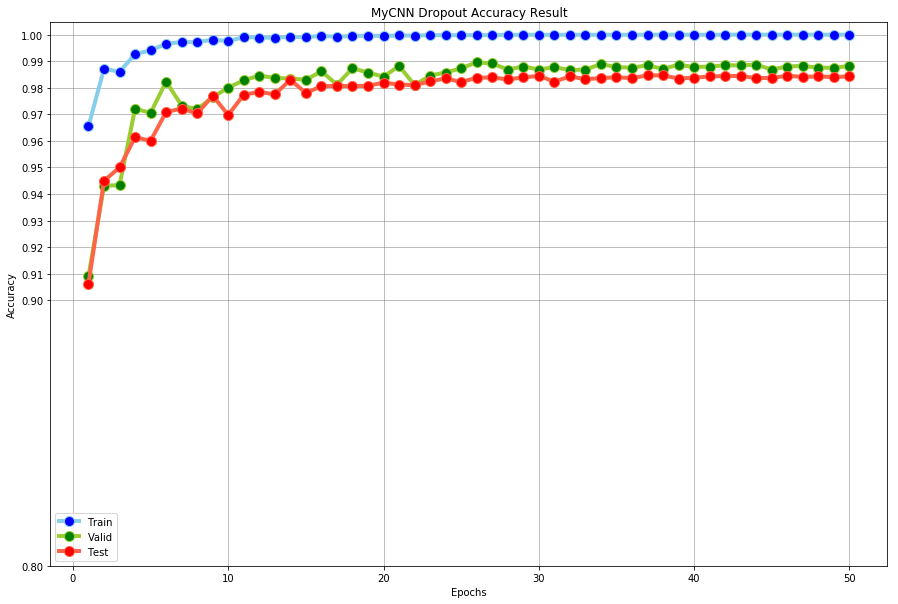

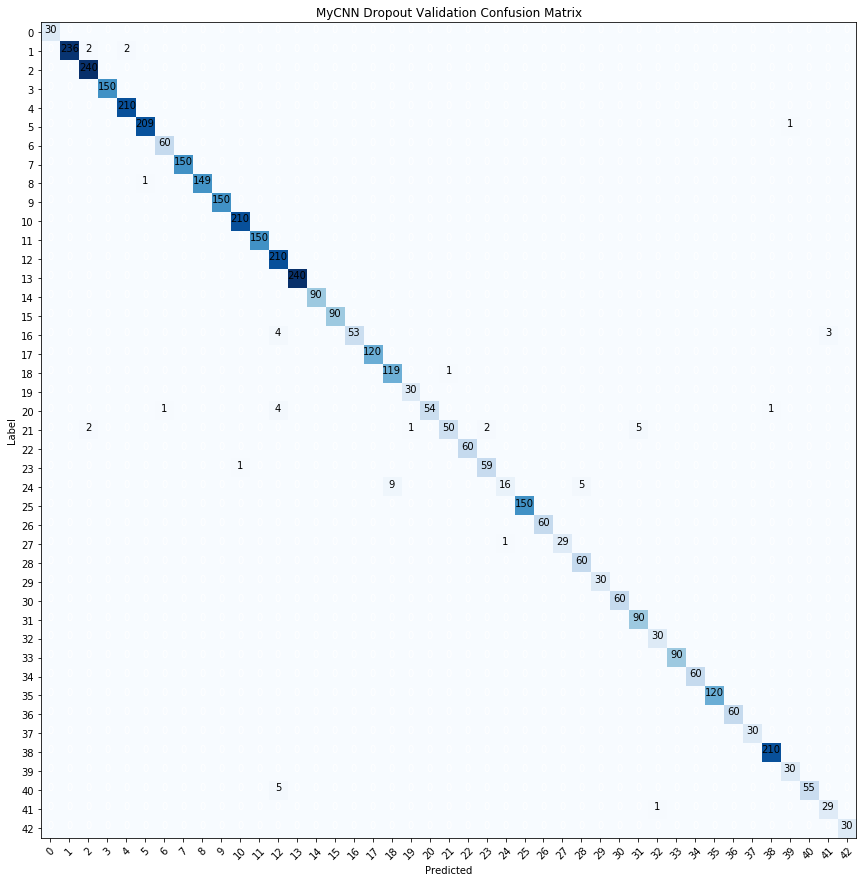

In [18]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train, y_train, indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "MyCNN Dropout")
show_cm(X_valid, y_valid, "MyCNN Dropout Validation")
model.save("models/MyCNN_dropout.ckpt")

### Oversampling Training Experiments

#### LeNet5

Epoch 0 - Train: 0.9365, Valid: 0.8673, Test: 0.8532
Epoch 1 - Train: 0.9617, Valid: 0.9036, Test: 0.8804
Epoch 2 - Train: 0.9815, Valid: 0.9209, Test: 0.8978
Epoch 3 - Train: 0.9903, Valid: 0.9249, Test: 0.9146
Epoch 4 - Train: 0.9940, Valid: 0.9338, Test: 0.9147
Epoch 5 - Train: 0.9807, Valid: 0.9018, Test: 0.9105
Epoch 6 - Train: 0.9910, Valid: 0.9283, Test: 0.9119
Epoch 7 - Train: 0.9878, Valid: 0.9367, Test: 0.9135
Epoch 8 - Train: 0.9855, Valid: 0.9308, Test: 0.9105
Epoch 9 - Train: 0.9908, Valid: 0.9297, Test: 0.9094
Epoch 10 - Train: 0.9961, Valid: 0.9438, Test: 0.9236
Epoch 11 - Train: 0.9960, Valid: 0.9476, Test: 0.9297
Epoch 12 - Train: 0.9959, Valid: 0.9379, Test: 0.9249
Epoch 13 - Train: 0.9968, Valid: 0.9390, Test: 0.9233
Epoch 14 - Train: 0.9948, Valid: 0.9270, Test: 0.9174
Epoch 15 - Train: 0.9988, Valid: 0.9508, Test: 0.9293
Epoch 16 - Train: 0.9990, Valid: 0.9385, Test: 0.9254
Epoch 17 - Train: 0.9968, Valid: 0.9438, Test: 0.9212
Epoch 18 - Train: 0.9973, Valid: 0.925

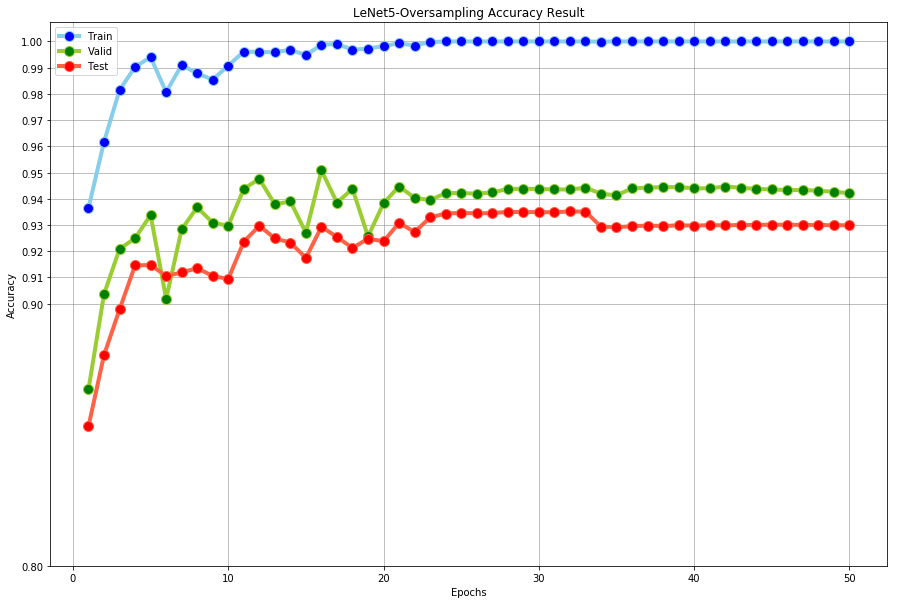

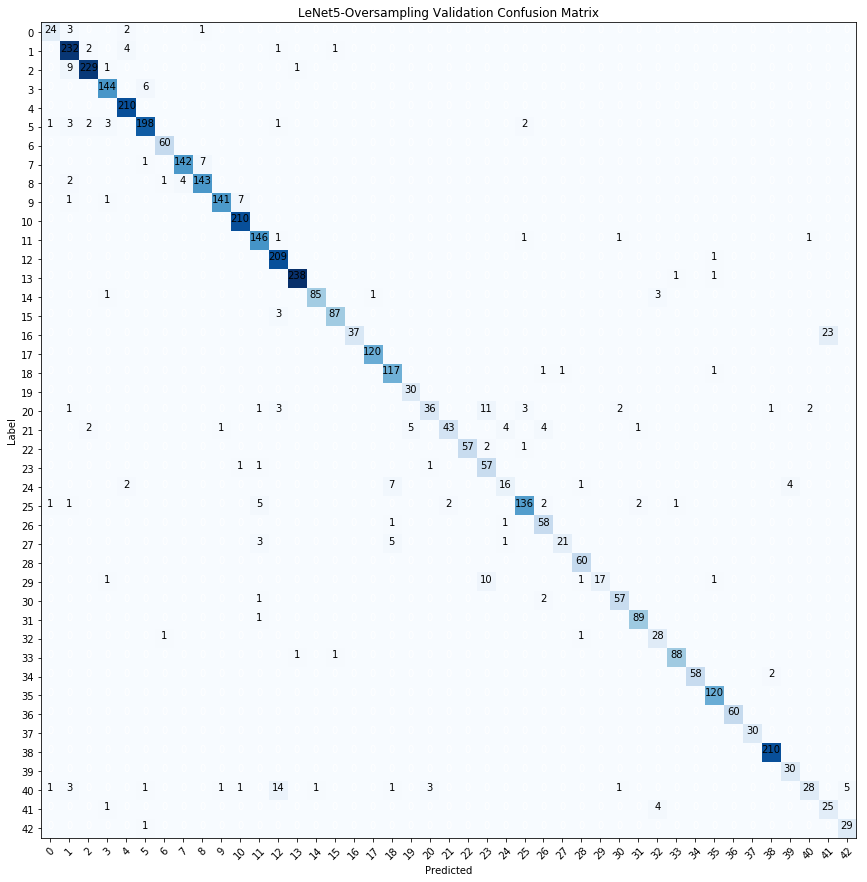

In [19]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over, y_train_over, over_indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Oversampling")
show_cm(X_valid, y_valid, "LeNet5-Oversampling Validation")
model.save("models/LeNet5-over.ckpt")

#### LeNet5 - Dropout

Epoch 0 - Train: 0.9220, Valid: 0.8435, Test: 0.8474
Epoch 1 - Train: 0.9512, Valid: 0.8898, Test: 0.8901
Epoch 2 - Train: 0.9635, Valid: 0.9050, Test: 0.8921
Epoch 3 - Train: 0.9471, Valid: 0.8673, Test: 0.8808
Epoch 4 - Train: 0.9793, Valid: 0.9265, Test: 0.9075
Epoch 5 - Train: 0.9872, Valid: 0.9274, Test: 0.9196
Epoch 6 - Train: 0.9822, Valid: 0.9084, Test: 0.9203
Epoch 7 - Train: 0.9917, Valid: 0.9426, Test: 0.9255
Epoch 8 - Train: 0.9949, Valid: 0.9483, Test: 0.9340
Epoch 9 - Train: 0.9957, Valid: 0.9447, Test: 0.9344
Epoch 10 - Train: 0.9872, Valid: 0.9295, Test: 0.9232
Epoch 11 - Train: 0.9868, Valid: 0.9048, Test: 0.9092
Epoch 12 - Train: 0.9951, Valid: 0.9408, Test: 0.9281
Epoch 13 - Train: 0.9909, Valid: 0.9365, Test: 0.9314
Epoch 14 - Train: 0.9975, Valid: 0.9494, Test: 0.9371
Epoch 15 - Train: 0.9988, Valid: 0.9612, Test: 0.9435
Epoch 16 - Train: 0.9977, Valid: 0.9476, Test: 0.9371
Epoch 17 - Train: 0.9993, Valid: 0.9637, Test: 0.9457
Epoch 18 - Train: 0.9978, Valid: 0.953

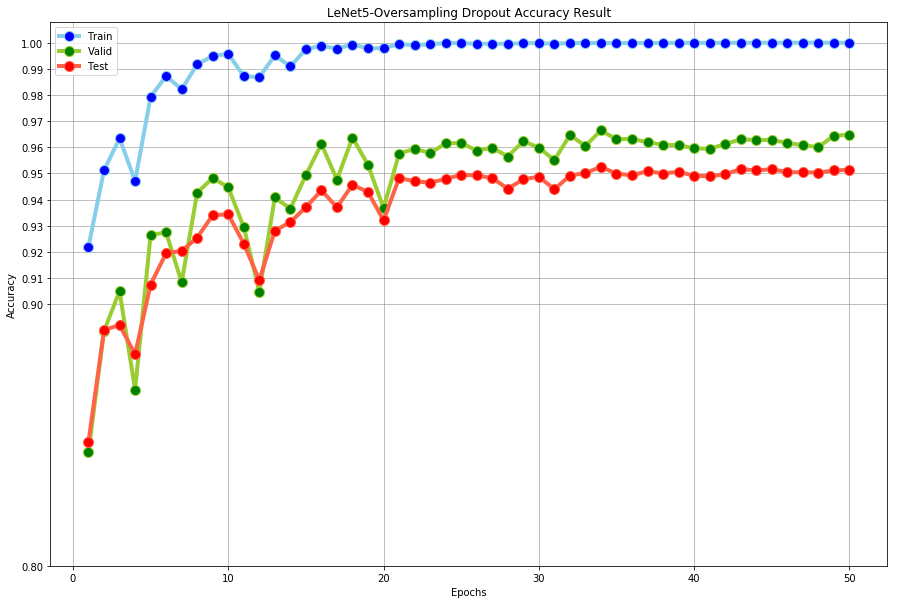

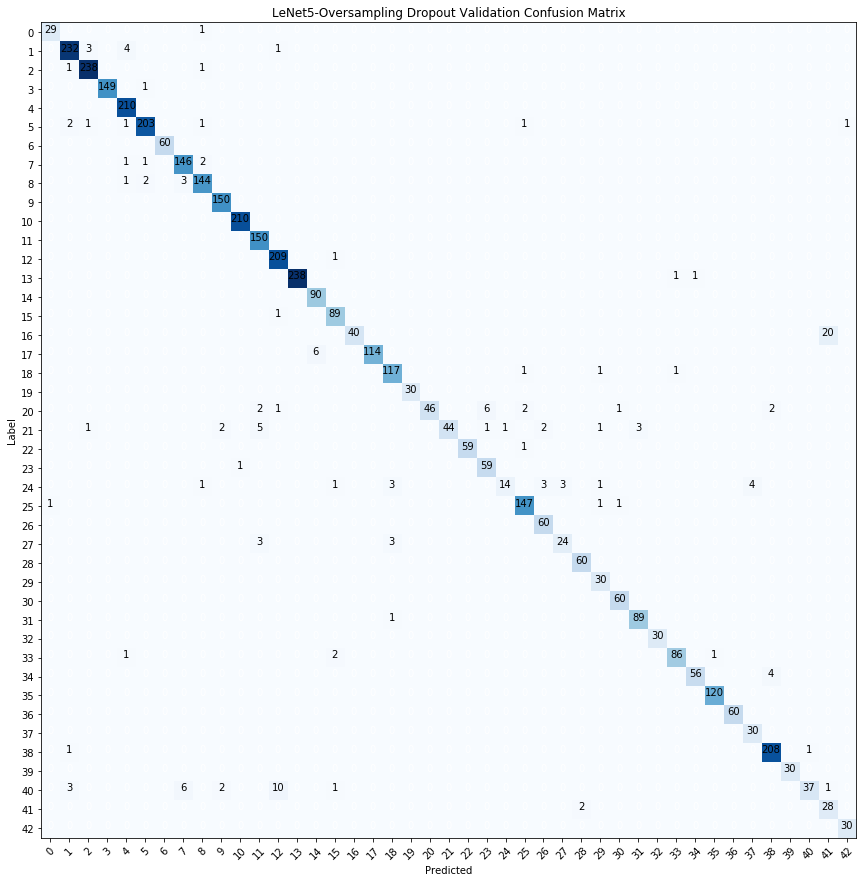

In [20]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over, y_train_over, over_indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Oversampling Dropout")
show_cm(X_valid, y_valid, "LeNet5-Oversampling Dropout Validation")
model.save("models/LeNet5-over_dropout.ckpt")

#### MyCNN

Epoch 0 - Train: 0.9784, Valid: 0.9565, Test: 0.9368
Epoch 1 - Train: 0.9898, Valid: 0.9762, Test: 0.9584
Epoch 2 - Train: 0.9867, Valid: 0.9698, Test: 0.9585
Epoch 3 - Train: 0.9899, Valid: 0.9714, Test: 0.9576
Epoch 4 - Train: 0.9940, Valid: 0.9803, Test: 0.9668
Epoch 5 - Train: 0.9945, Valid: 0.9803, Test: 0.9670
Epoch 6 - Train: 0.9936, Valid: 0.9828, Test: 0.9670
Epoch 7 - Train: 0.9950, Valid: 0.9810, Test: 0.9681
Epoch 8 - Train: 0.9969, Valid: 0.9857, Test: 0.9737
Epoch 9 - Train: 0.9983, Valid: 0.9834, Test: 0.9719
Epoch 10 - Train: 0.9989, Valid: 0.9839, Test: 0.9735
Epoch 11 - Train: 0.9992, Valid: 0.9816, Test: 0.9741
Epoch 12 - Train: 0.9993, Valid: 0.9853, Test: 0.9754
Epoch 13 - Train: 0.9987, Valid: 0.9791, Test: 0.9733
Epoch 14 - Train: 0.9991, Valid: 0.9828, Test: 0.9752
Epoch 15 - Train: 0.9994, Valid: 0.9828, Test: 0.9747
Epoch 16 - Train: 0.9996, Valid: 0.9830, Test: 0.9743
Epoch 17 - Train: 0.9995, Valid: 0.9823, Test: 0.9747
Epoch 18 - Train: 0.9995, Valid: 0.982

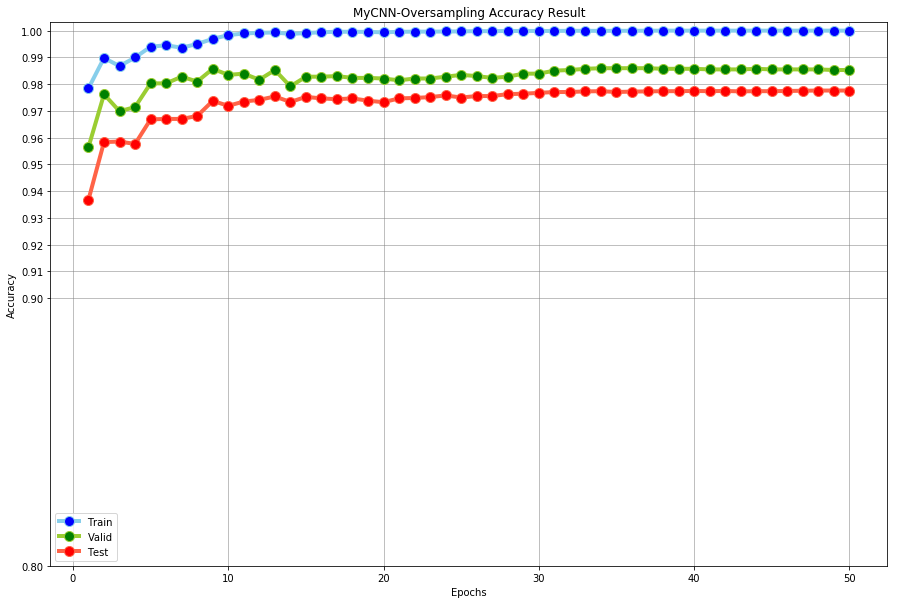

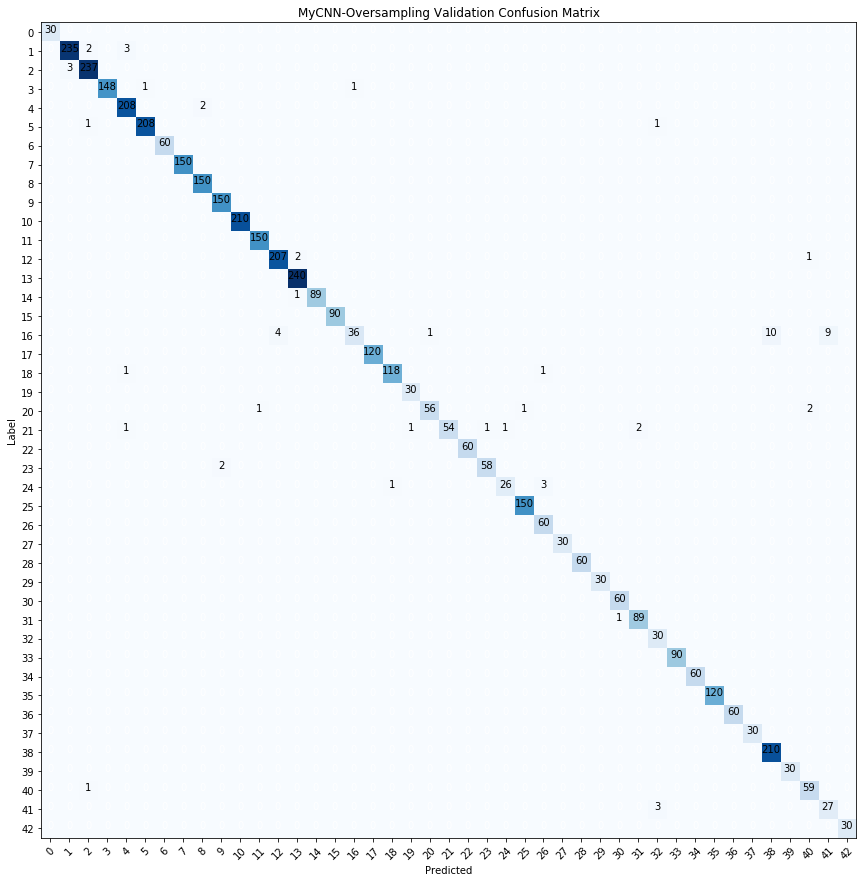

In [21]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over, y_train_over, over_indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Oversampling")
show_cm(X_valid, y_valid, "MyCNN-Oversampling Validation")
model.save("models/MyCNN-over.ckpt")

#### MyCNN - Dropout

Epoch 0 - Train: 0.9686, Valid: 0.9376, Test: 0.9229
Epoch 1 - Train: 0.9869, Valid: 0.9746, Test: 0.9474
Epoch 2 - Train: 0.9901, Valid: 0.9705, Test: 0.9523
Epoch 3 - Train: 0.9920, Valid: 0.9753, Test: 0.9607
Epoch 4 - Train: 0.9953, Valid: 0.9800, Test: 0.9689
Epoch 5 - Train: 0.9950, Valid: 0.9791, Test: 0.9682
Epoch 6 - Train: 0.9966, Valid: 0.9850, Test: 0.9685
Epoch 7 - Train: 0.9973, Valid: 0.9882, Test: 0.9741
Epoch 8 - Train: 0.9964, Valid: 0.9846, Test: 0.9731
Epoch 9 - Train: 0.9980, Valid: 0.9841, Test: 0.9782
Epoch 10 - Train: 0.9981, Valid: 0.9873, Test: 0.9736
Epoch 11 - Train: 0.9973, Valid: 0.9823, Test: 0.9751
Epoch 12 - Train: 0.9979, Valid: 0.9912, Test: 0.9741
Epoch 13 - Train: 0.9989, Valid: 0.9916, Test: 0.9814
Epoch 14 - Train: 0.9968, Valid: 0.9866, Test: 0.9791
Epoch 15 - Train: 0.9987, Valid: 0.9887, Test: 0.9795
Epoch 16 - Train: 0.9991, Valid: 0.9896, Test: 0.9810
Epoch 17 - Train: 0.9987, Valid: 0.9882, Test: 0.9802
Epoch 18 - Train: 0.9992, Valid: 0.990

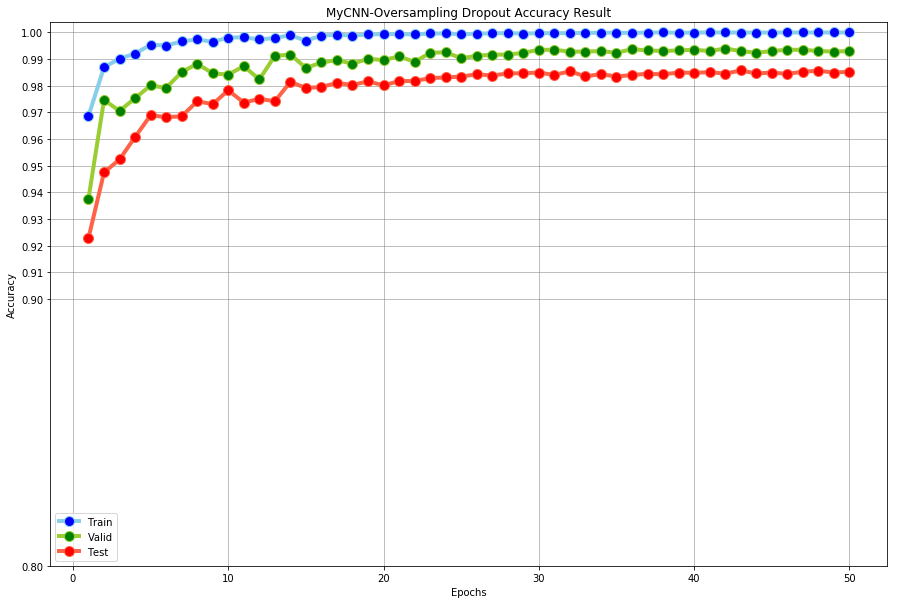

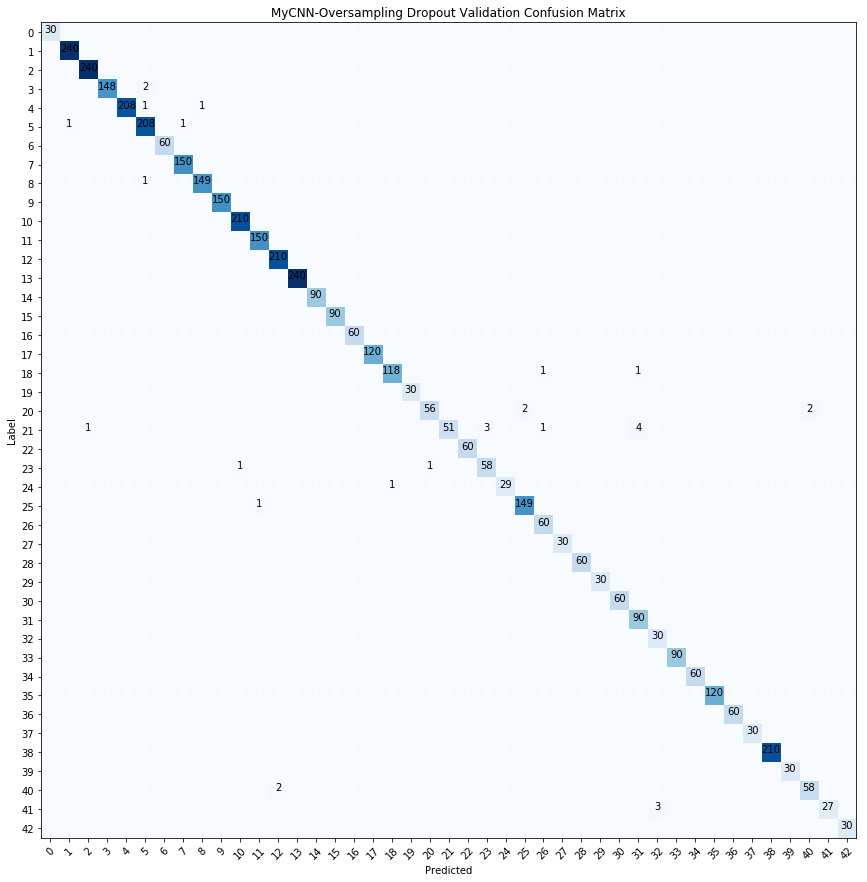

In [22]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over, y_train_over, over_indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Oversampling Dropout")
show_cm(X_valid, y_valid, "MyCNN-Oversampling Dropout Validation")
model.save("models/MyCNN-over_dropout.ckpt")

### Random Augmentation Training Experiments

#### LeNet5

Epoch 0 - Train: 0.9297, Valid: 0.8787, Test: 0.8720
Epoch 1 - Train: 0.8916, Valid: 0.8277, Test: 0.8284
Epoch 2 - Train: 0.9640, Valid: 0.9200, Test: 0.8982
Epoch 3 - Train: 0.9722, Valid: 0.9202, Test: 0.9022
Epoch 4 - Train: 0.9784, Valid: 0.9295, Test: 0.9141
Epoch 5 - Train: 0.9886, Valid: 0.9449, Test: 0.9276
Epoch 6 - Train: 0.9807, Valid: 0.9395, Test: 0.9177
Epoch 7 - Train: 0.9900, Valid: 0.9483, Test: 0.9297
Epoch 8 - Train: 0.9907, Valid: 0.9506, Test: 0.9322
Epoch 9 - Train: 0.9929, Valid: 0.9556, Test: 0.9322
Epoch 10 - Train: 0.9912, Valid: 0.9481, Test: 0.9276
Epoch 11 - Train: 0.9925, Valid: 0.9526, Test: 0.9354
Epoch 12 - Train: 0.9916, Valid: 0.9508, Test: 0.9316
Epoch 13 - Train: 0.9943, Valid: 0.9519, Test: 0.9335
Epoch 14 - Train: 0.9939, Valid: 0.9553, Test: 0.9346
Epoch 15 - Train: 0.9957, Valid: 0.9571, Test: 0.9389
Epoch 16 - Train: 0.9966, Valid: 0.9608, Test: 0.9367
Epoch 17 - Train: 0.9965, Valid: 0.9574, Test: 0.9381
Epoch 18 - Train: 0.9970, Valid: 0.959

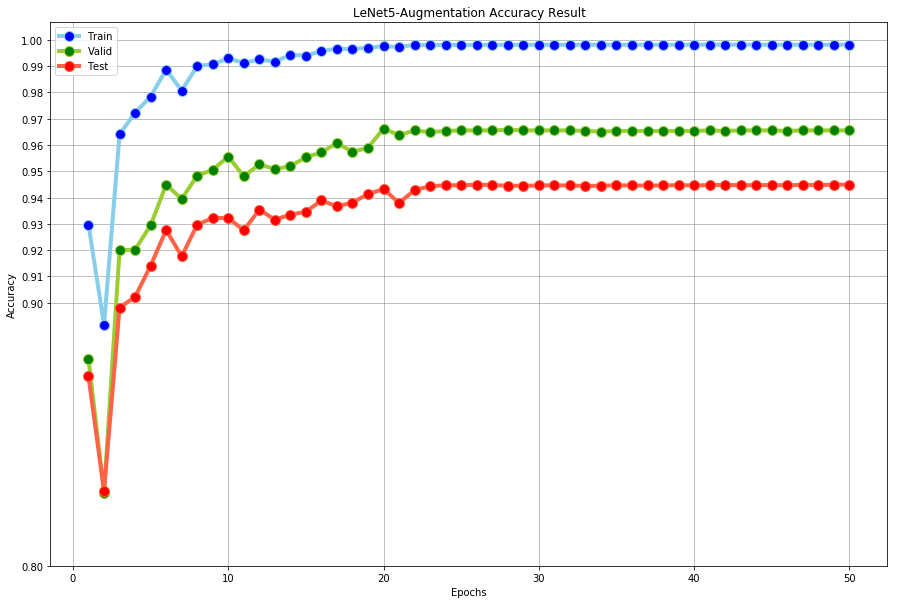

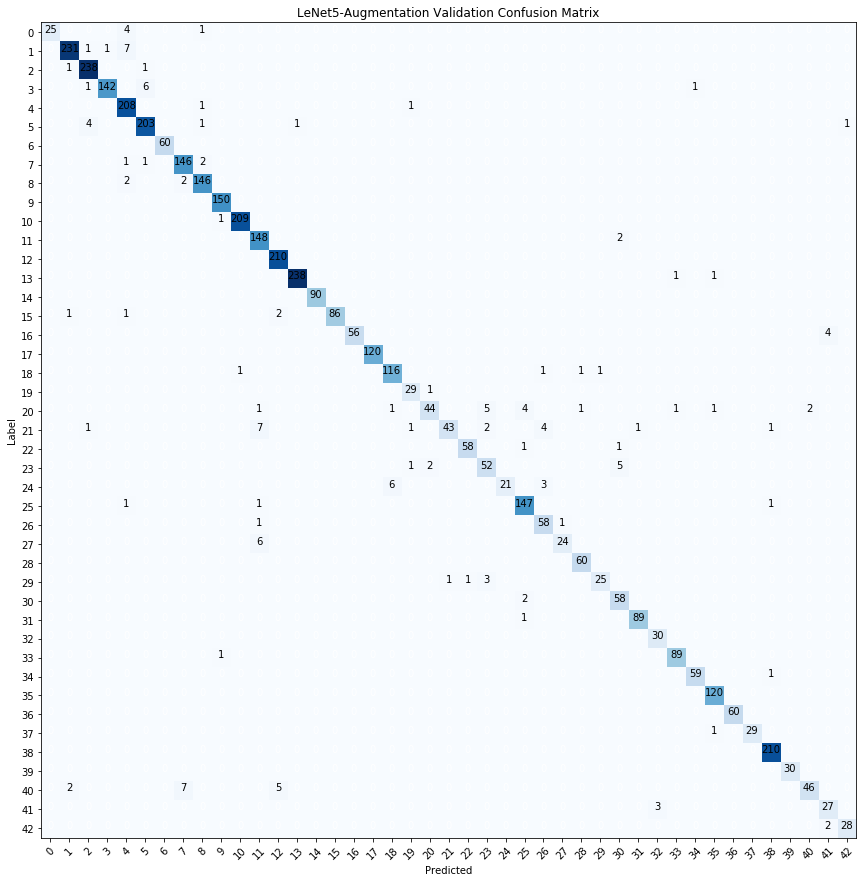

In [23]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_aug, y_train_aug, indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Augmentation")
show_cm(X_valid, y_valid, "LeNet5-Augmentation Validation")
model.save("models/LeNet5-aug.ckpt")

#### LeNet5 - Dropout

Epoch 0 - Train: 0.9363, Valid: 0.8601, Test: 0.8587
Epoch 1 - Train: 0.9510, Valid: 0.9122, Test: 0.8884
Epoch 2 - Train: 0.9644, Valid: 0.9088, Test: 0.8974
Epoch 3 - Train: 0.9446, Valid: 0.8853, Test: 0.8822
Epoch 4 - Train: 0.9325, Valid: 0.8898, Test: 0.8647
Epoch 5 - Train: 0.9894, Valid: 0.9494, Test: 0.9294
Epoch 6 - Train: 0.9893, Valid: 0.9424, Test: 0.9337
Epoch 7 - Train: 0.9820, Valid: 0.9451, Test: 0.9168
Epoch 8 - Train: 0.9935, Valid: 0.9635, Test: 0.9388
Epoch 9 - Train: 0.9911, Valid: 0.9576, Test: 0.9373
Epoch 10 - Train: 0.9927, Valid: 0.9492, Test: 0.9377
Epoch 11 - Train: 0.9952, Valid: 0.9506, Test: 0.9435
Epoch 12 - Train: 0.9962, Valid: 0.9599, Test: 0.9462
Epoch 13 - Train: 0.9960, Valid: 0.9642, Test: 0.9468
Epoch 14 - Train: 0.9970, Valid: 0.9639, Test: 0.9473
Epoch 15 - Train: 0.9966, Valid: 0.9678, Test: 0.9480
Epoch 16 - Train: 0.9974, Valid: 0.9610, Test: 0.9466
Epoch 17 - Train: 0.9970, Valid: 0.9624, Test: 0.9452
Epoch 18 - Train: 0.9982, Valid: 0.962

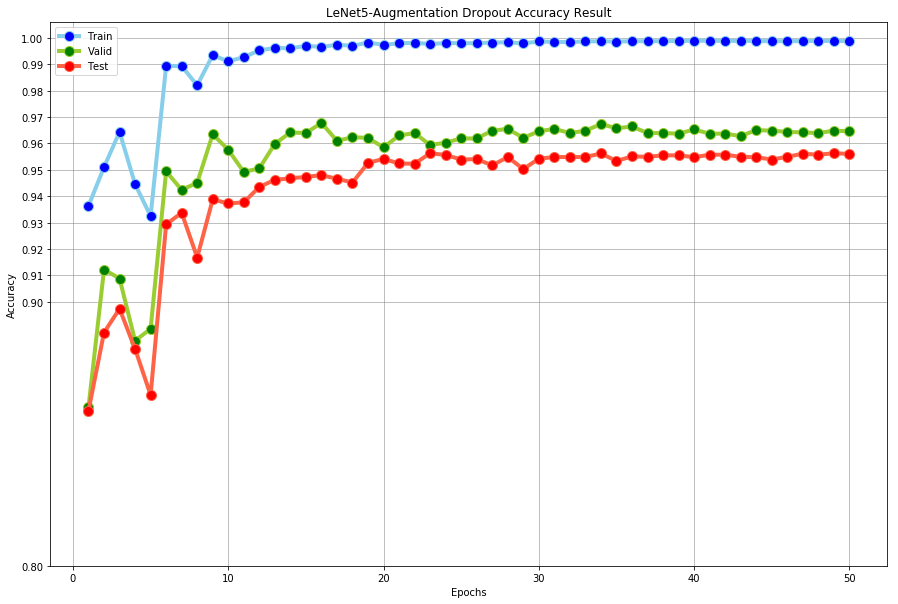

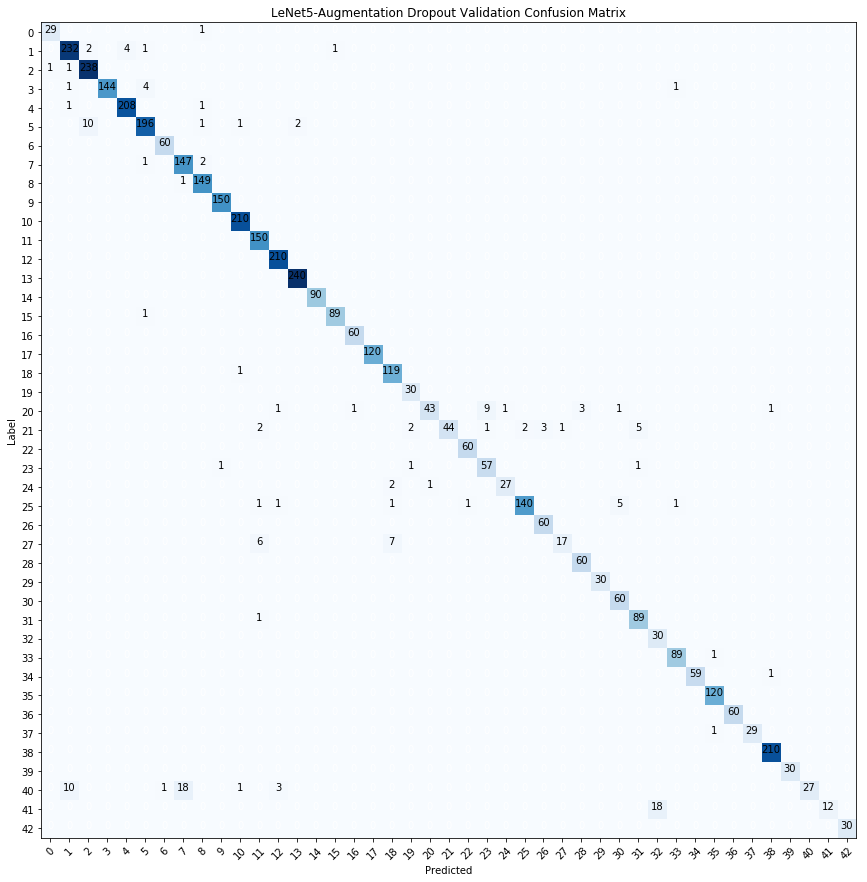

In [24]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_aug, y_train_aug, indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Augmentation Dropout")
show_cm(X_valid, y_valid, "LeNet5-Augmentation Dropout Validation")
model.save("models/LeNet5-aug_dropout.ckpt")

#### MyCNN

Epoch 0 - Train: 0.9561, Valid: 0.9018, Test: 0.8884
Epoch 1 - Train: 0.9842, Valid: 0.9447, Test: 0.9402
Epoch 2 - Train: 0.9868, Valid: 0.9406, Test: 0.9283
Epoch 3 - Train: 0.9909, Valid: 0.9653, Test: 0.9533
Epoch 4 - Train: 0.9931, Valid: 0.9662, Test: 0.9563
Epoch 5 - Train: 0.9947, Valid: 0.9707, Test: 0.9593
Epoch 6 - Train: 0.9944, Valid: 0.9789, Test: 0.9600
Epoch 7 - Train: 0.9975, Valid: 0.9787, Test: 0.9672
Epoch 8 - Train: 0.9970, Valid: 0.9755, Test: 0.9667
Epoch 9 - Train: 0.9969, Valid: 0.9816, Test: 0.9679
Epoch 10 - Train: 0.9971, Valid: 0.9807, Test: 0.9657
Epoch 11 - Train: 0.9974, Valid: 0.9776, Test: 0.9675
Epoch 12 - Train: 0.9977, Valid: 0.9798, Test: 0.9683
Epoch 13 - Train: 0.9982, Valid: 0.9798, Test: 0.9688
Epoch 14 - Train: 0.9988, Valid: 0.9812, Test: 0.9716
Epoch 15 - Train: 0.9989, Valid: 0.9812, Test: 0.9718
Epoch 16 - Train: 0.9989, Valid: 0.9810, Test: 0.9724
Epoch 17 - Train: 0.9991, Valid: 0.9816, Test: 0.9738
Epoch 18 - Train: 0.9989, Valid: 0.981

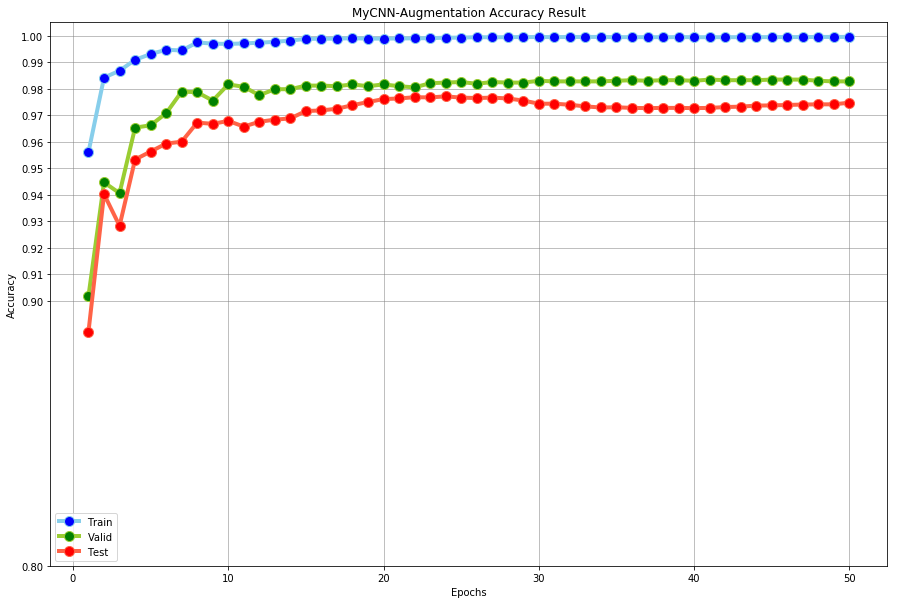

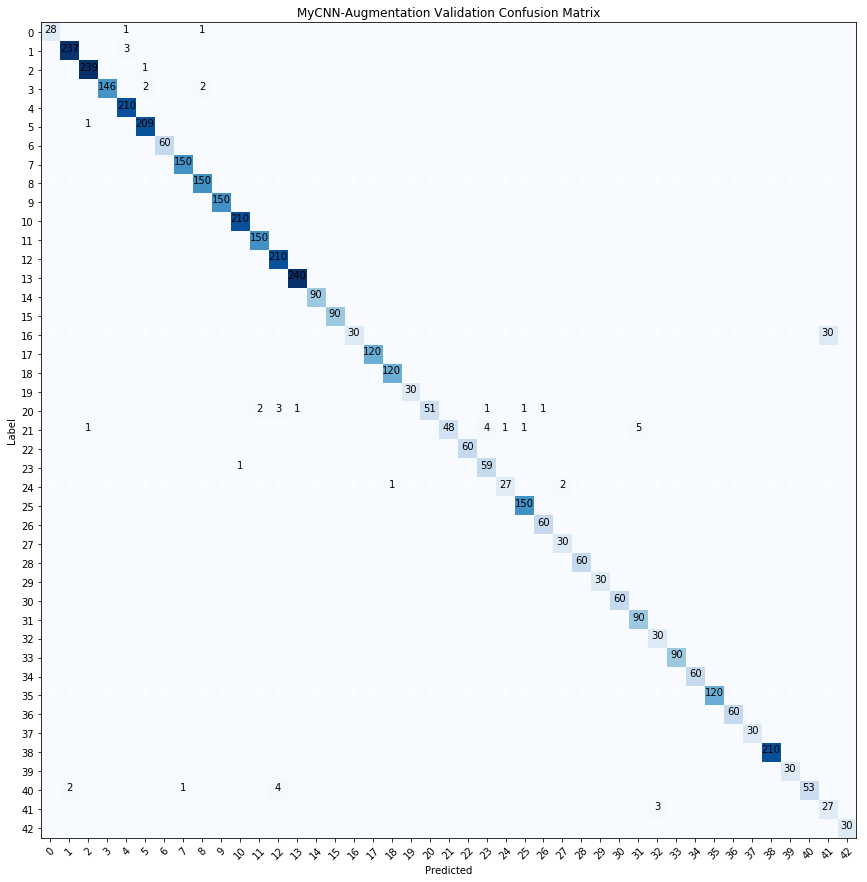

In [25]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_aug, y_train_aug, indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Augmentation")
show_cm(X_valid, y_valid, "MyCNN-Augmentation Validation")
model.save("models/MyCNN-aug.ckpt")

#### MyCNN - Dropout

Epoch 0 - Train: 0.9555, Valid: 0.9039, Test: 0.9061
Epoch 1 - Train: 0.9822, Valid: 0.9478, Test: 0.9352
Epoch 2 - Train: 0.9845, Valid: 0.9551, Test: 0.9454
Epoch 3 - Train: 0.9894, Valid: 0.9553, Test: 0.9523
Epoch 4 - Train: 0.9873, Valid: 0.9723, Test: 0.9449
Epoch 5 - Train: 0.9942, Valid: 0.9776, Test: 0.9612
Epoch 6 - Train: 0.9944, Valid: 0.9696, Test: 0.9647
Epoch 7 - Train: 0.9927, Valid: 0.9710, Test: 0.9521
Epoch 8 - Train: 0.9966, Valid: 0.9816, Test: 0.9678
Epoch 9 - Train: 0.9968, Valid: 0.9735, Test: 0.9653
Epoch 10 - Train: 0.9975, Valid: 0.9805, Test: 0.9699
Epoch 11 - Train: 0.9978, Valid: 0.9866, Test: 0.9711
Epoch 12 - Train: 0.9986, Valid: 0.9887, Test: 0.9681
Epoch 13 - Train: 0.9981, Valid: 0.9864, Test: 0.9727
Epoch 14 - Train: 0.9987, Valid: 0.9850, Test: 0.9731
Epoch 15 - Train: 0.9985, Valid: 0.9902, Test: 0.9748
Epoch 16 - Train: 0.9986, Valid: 0.9825, Test: 0.9759
Epoch 17 - Train: 0.9986, Valid: 0.9873, Test: 0.9705
Epoch 18 - Train: 0.9987, Valid: 0.989

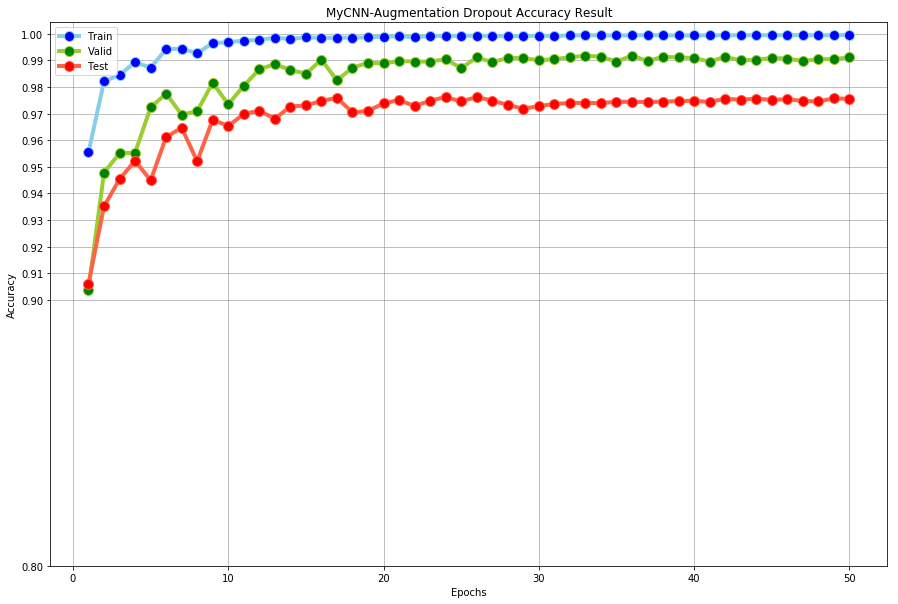

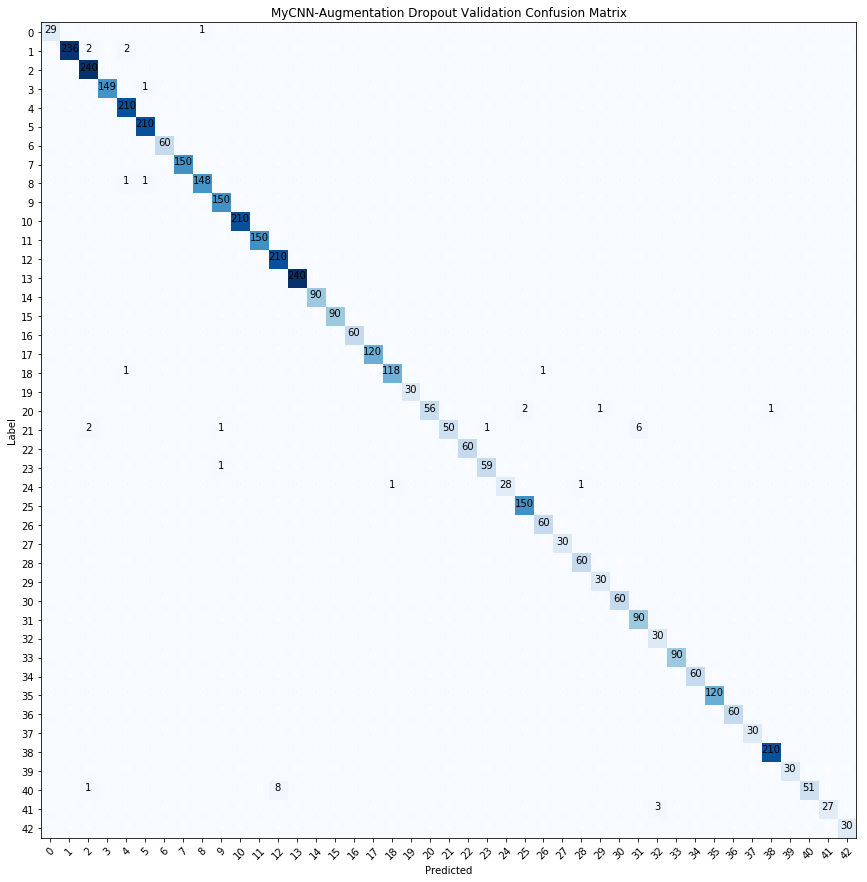

In [26]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_aug, y_train_aug, indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Augmentation Dropout")
show_cm(X_valid, y_valid, "MyCNN-Augmentation Dropout Validation")
model.save("models/MyCNN-aug_dropout.ckpt")

### Oversampling and Random Augmentation Training Experiments

#### LeNet5

Epoch 0 - Train: 0.8549, Valid: 0.8200, Test: 0.7784
Epoch 1 - Train: 0.9669, Valid: 0.8912, Test: 0.8958
Epoch 2 - Train: 0.9796, Valid: 0.9175, Test: 0.9101
Epoch 3 - Train: 0.9790, Valid: 0.9098, Test: 0.9140
Epoch 4 - Train: 0.9591, Valid: 0.8939, Test: 0.8792
Epoch 5 - Train: 0.9847, Valid: 0.9222, Test: 0.9186
Epoch 6 - Train: 0.9811, Valid: 0.9204, Test: 0.9086
Epoch 7 - Train: 0.9716, Valid: 0.9084, Test: 0.8976
Epoch 8 - Train: 0.9818, Valid: 0.9238, Test: 0.9150
Epoch 9 - Train: 0.9891, Valid: 0.9347, Test: 0.9201
Epoch 10 - Train: 0.9892, Valid: 0.9347, Test: 0.9233
Epoch 11 - Train: 0.9915, Valid: 0.9444, Test: 0.9298
Epoch 12 - Train: 0.9917, Valid: 0.9476, Test: 0.9238
Epoch 13 - Train: 0.9939, Valid: 0.9381, Test: 0.9334
Epoch 14 - Train: 0.9914, Valid: 0.9345, Test: 0.9307
Epoch 15 - Train: 0.9947, Valid: 0.9478, Test: 0.9300
Epoch 16 - Train: 0.9930, Valid: 0.9399, Test: 0.9264
Epoch 17 - Train: 0.9932, Valid: 0.9395, Test: 0.9310
Epoch 18 - Train: 0.9969, Valid: 0.951

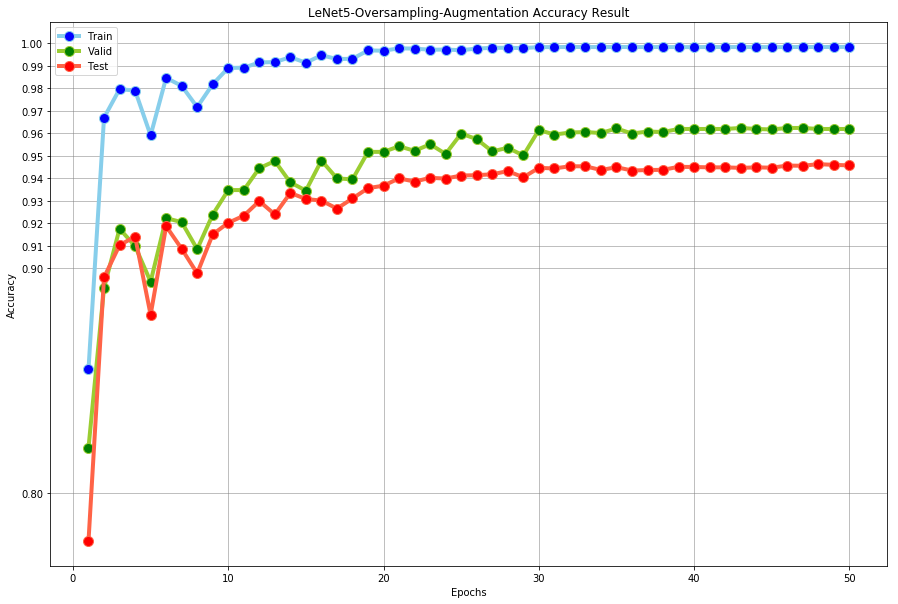

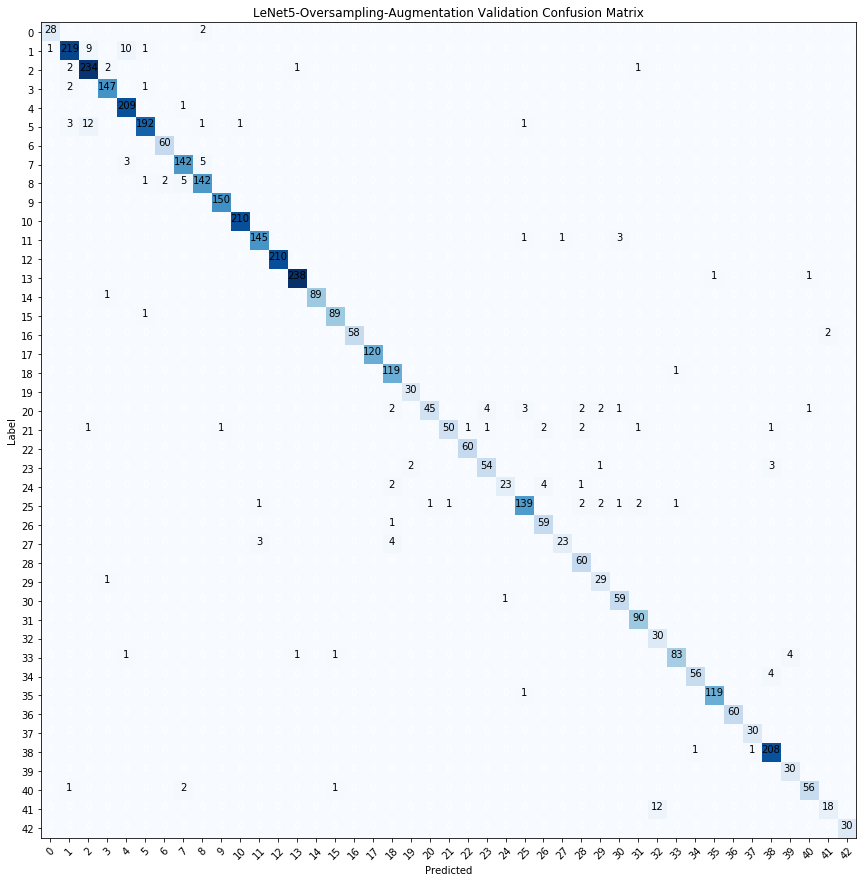

In [27]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over_aug, y_train_over_aug, over_indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Oversampling-Augmentation")
show_cm(X_valid, y_valid, "LeNet5-Oversampling-Augmentation Validation")
model.save("models/LeNet5-over-aug.ckpt")

#### LeNet5 - Dropout

Epoch 0 - Train: 0.9561, Valid: 0.9054, Test: 0.8814
Epoch 1 - Train: 0.9501, Valid: 0.8934, Test: 0.8816
Epoch 2 - Train: 0.9521, Valid: 0.9145, Test: 0.8982
Epoch 3 - Train: 0.9654, Valid: 0.9229, Test: 0.9115
Epoch 4 - Train: 0.9757, Valid: 0.9252, Test: 0.9121
Epoch 5 - Train: 0.9741, Valid: 0.9354, Test: 0.9154
Epoch 6 - Train: 0.9782, Valid: 0.9440, Test: 0.9156
Epoch 7 - Train: 0.9824, Valid: 0.9454, Test: 0.9183
Epoch 8 - Train: 0.9854, Valid: 0.9508, Test: 0.9309
Epoch 9 - Train: 0.9878, Valid: 0.9542, Test: 0.9353
Epoch 10 - Train: 0.9853, Valid: 0.9440, Test: 0.9192
Epoch 11 - Train: 0.9919, Valid: 0.9519, Test: 0.9314
Epoch 12 - Train: 0.9950, Valid: 0.9608, Test: 0.9479
Epoch 13 - Train: 0.9952, Valid: 0.9587, Test: 0.9454
Epoch 14 - Train: 0.9913, Valid: 0.9483, Test: 0.9316
Epoch 15 - Train: 0.9958, Valid: 0.9644, Test: 0.9523
Epoch 16 - Train: 0.9949, Valid: 0.9601, Test: 0.9486
Epoch 17 - Train: 0.9951, Valid: 0.9621, Test: 0.9483
Epoch 18 - Train: 0.9959, Valid: 0.960

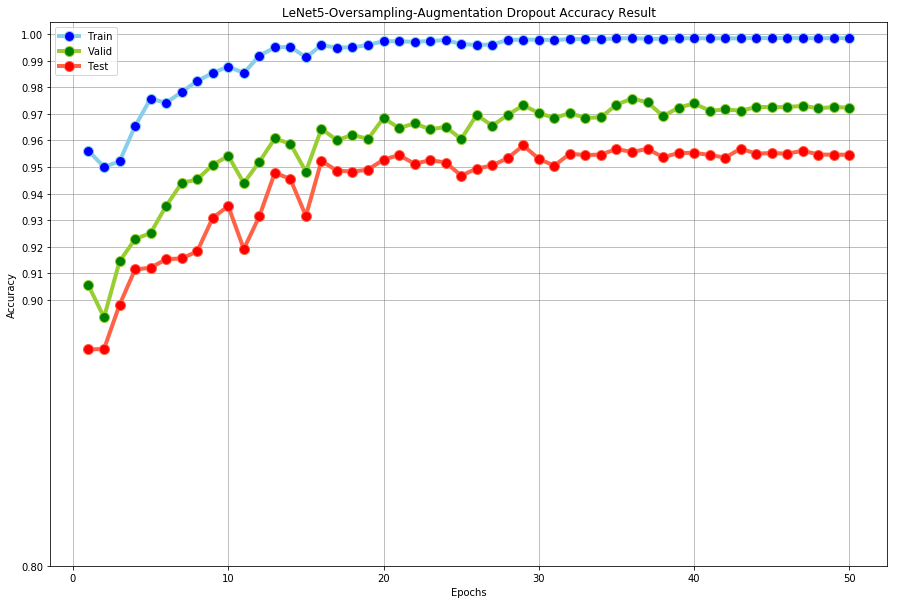

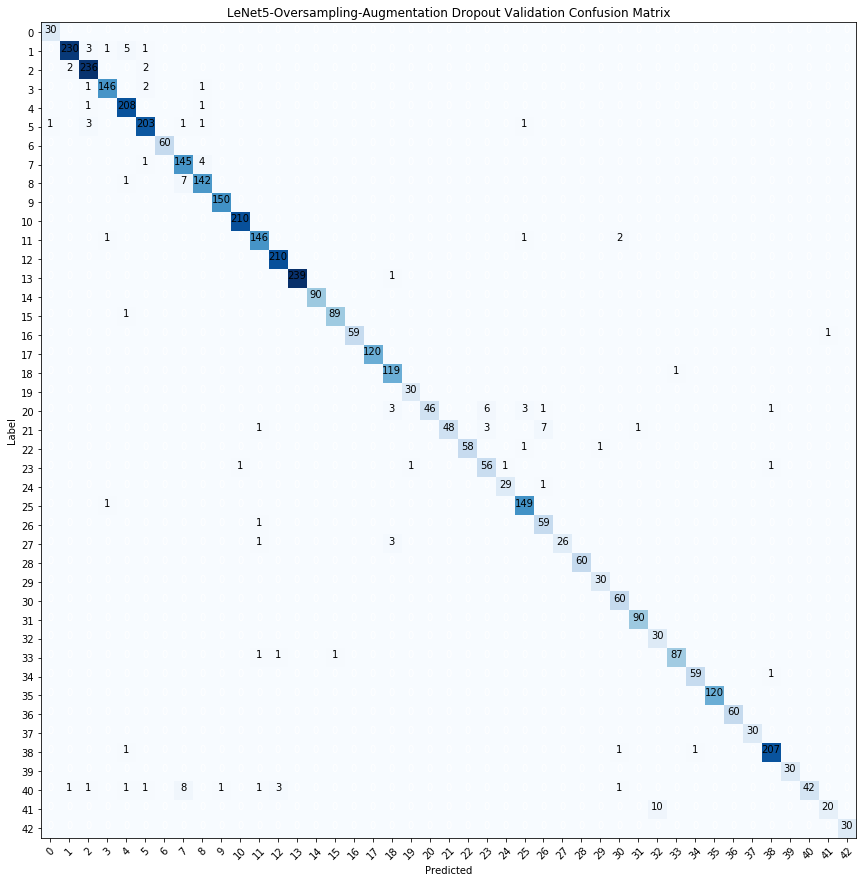

In [28]:
model = LeNet5([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over_aug, y_train_over_aug, over_indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "LeNet5-Oversampling-Augmentation Dropout")
show_cm(X_valid, y_valid, "LeNet5-Oversampling-Augmentation Dropout Validation")
model.save("models/LeNet5-over-aug_dropout.ckpt")

#### MyCNN

Epoch 0 - Train: 0.9713, Valid: 0.9492, Test: 0.9279
Epoch 1 - Train: 0.9839, Valid: 0.9764, Test: 0.9403
Epoch 2 - Train: 0.9905, Valid: 0.9723, Test: 0.9633
Epoch 3 - Train: 0.9936, Valid: 0.9755, Test: 0.9626
Epoch 4 - Train: 0.9901, Valid: 0.9687, Test: 0.9631
Epoch 5 - Train: 0.9953, Valid: 0.9696, Test: 0.9627
Epoch 6 - Train: 0.9916, Valid: 0.9778, Test: 0.9623
Epoch 7 - Train: 0.9963, Valid: 0.9771, Test: 0.9641
Epoch 8 - Train: 0.9973, Valid: 0.9814, Test: 0.9669
Epoch 9 - Train: 0.9971, Valid: 0.9841, Test: 0.9697
Epoch 10 - Train: 0.9972, Valid: 0.9864, Test: 0.9694
Epoch 11 - Train: 0.9970, Valid: 0.9868, Test: 0.9688
Epoch 12 - Train: 0.9972, Valid: 0.9875, Test: 0.9662
Epoch 13 - Train: 0.9980, Valid: 0.9878, Test: 0.9709
Epoch 14 - Train: 0.9977, Valid: 0.9866, Test: 0.9694
Epoch 15 - Train: 0.9981, Valid: 0.9857, Test: 0.9720
Epoch 16 - Train: 0.9980, Valid: 0.9850, Test: 0.9716
Epoch 17 - Train: 0.9980, Valid: 0.9862, Test: 0.9708
Epoch 18 - Train: 0.9980, Valid: 0.987

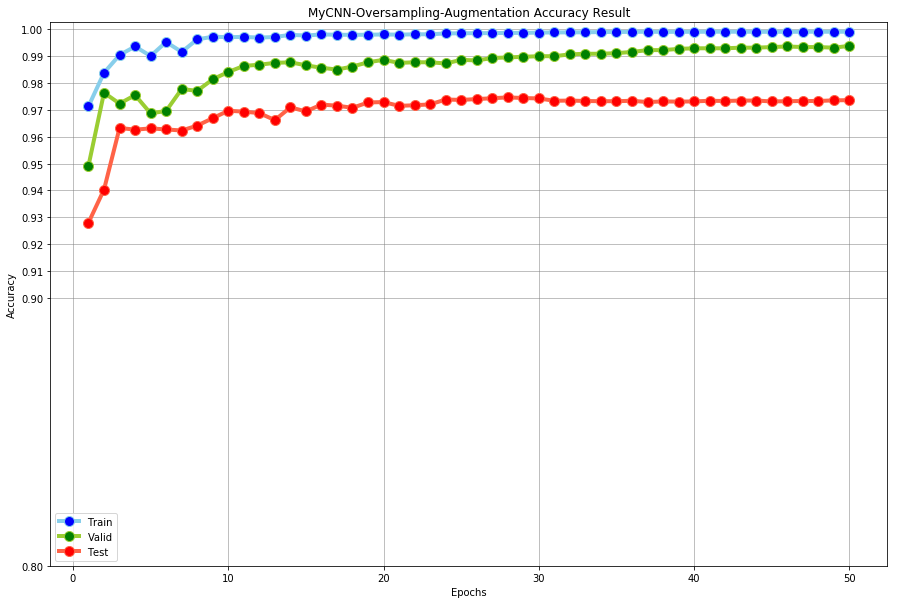

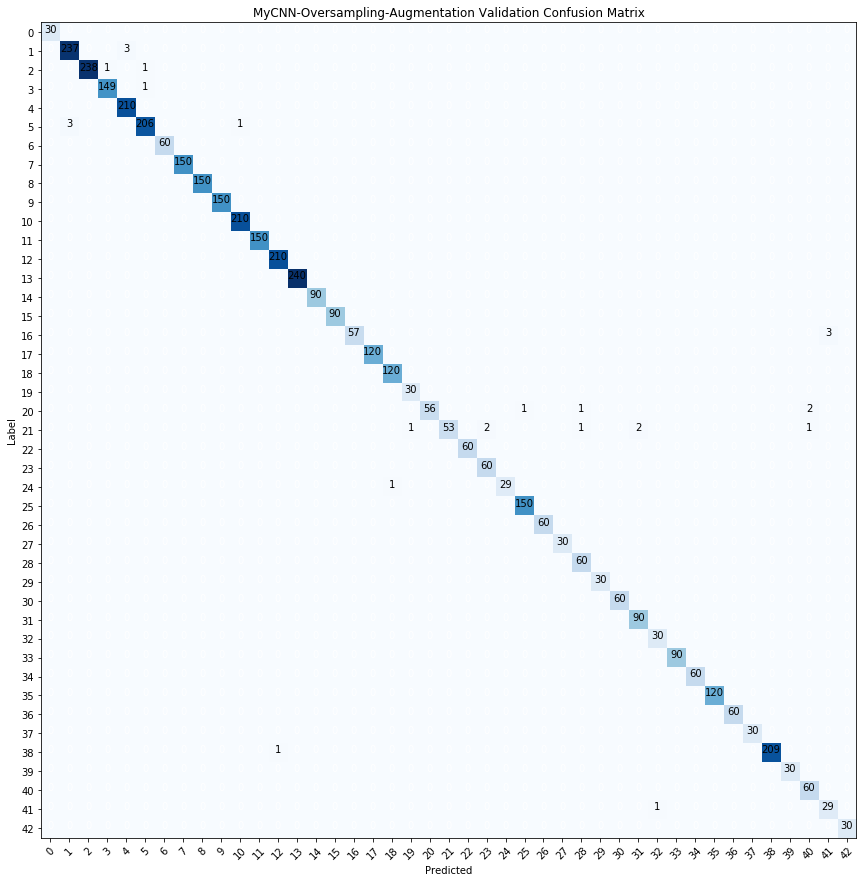

In [29]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over_aug, y_train_over_aug, over_indexes, keep_prob=1)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Oversampling-Augmentation")
show_cm(X_valid, y_valid, "MyCNN-Oversampling-Augmentation Validation")
model.save("models/MyCNN-over-aug.ckpt")

#### MyCNN - Dropout

Epoch 0 - Train: 0.9748, Valid: 0.9526, Test: 0.9373
Epoch 1 - Train: 0.9893, Valid: 0.9762, Test: 0.9554
Epoch 2 - Train: 0.9805, Valid: 0.9603, Test: 0.9504
Epoch 3 - Train: 0.9926, Valid: 0.9789, Test: 0.9616
Epoch 4 - Train: 0.9947, Valid: 0.9834, Test: 0.9667
Epoch 5 - Train: 0.9945, Valid: 0.9832, Test: 0.9696
Epoch 6 - Train: 0.9949, Valid: 0.9864, Test: 0.9686
Epoch 7 - Train: 0.9951, Valid: 0.9868, Test: 0.9681
Epoch 8 - Train: 0.9977, Valid: 0.9907, Test: 0.9762
Epoch 9 - Train: 0.9971, Valid: 0.9864, Test: 0.9721
Epoch 10 - Train: 0.9965, Valid: 0.9871, Test: 0.9751
Epoch 11 - Train: 0.9975, Valid: 0.9923, Test: 0.9744
Epoch 12 - Train: 0.9976, Valid: 0.9914, Test: 0.9777
Epoch 13 - Train: 0.9981, Valid: 0.9896, Test: 0.9759
Epoch 14 - Train: 0.9976, Valid: 0.9916, Test: 0.9753
Epoch 15 - Train: 0.9984, Valid: 0.9898, Test: 0.9775
Epoch 16 - Train: 0.9987, Valid: 0.9907, Test: 0.9762
Epoch 17 - Train: 0.9978, Valid: 0.9900, Test: 0.9729
Epoch 18 - Train: 0.9987, Valid: 0.990

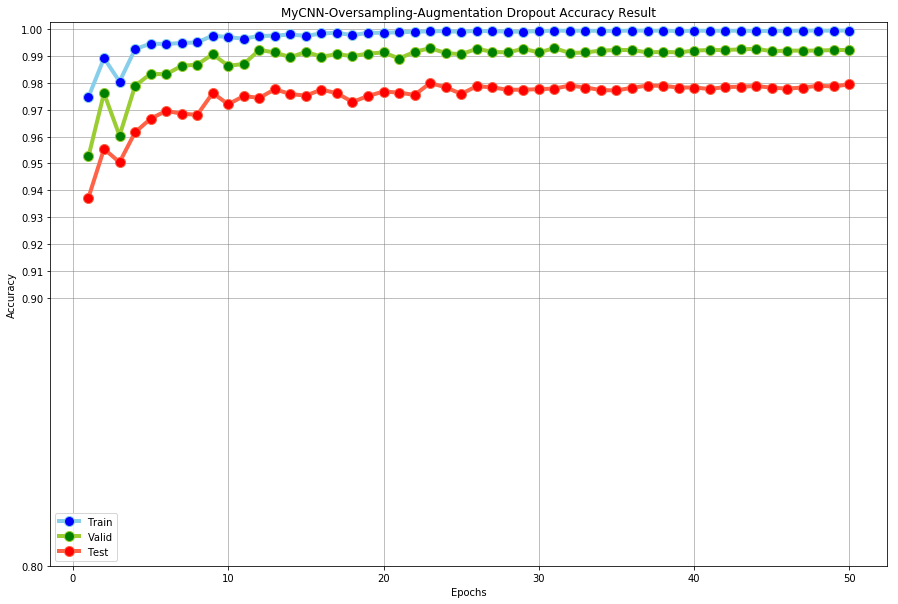

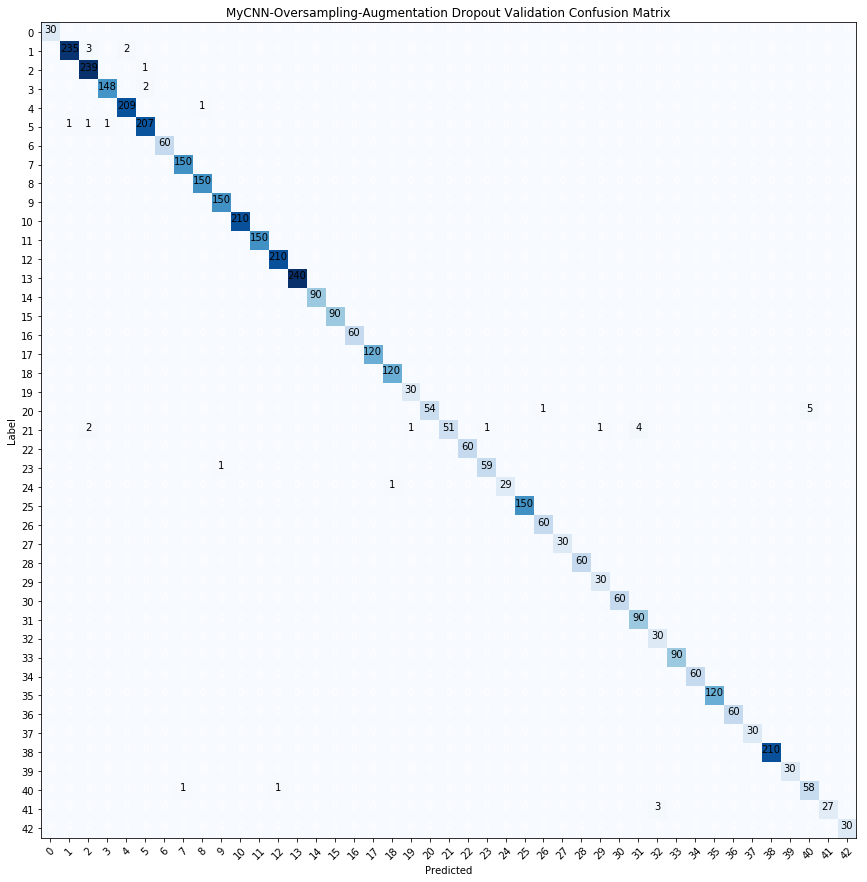

In [30]:
model = MyCNN([32, 32, 1], n_classes)
train_accs, valid_accs, test_accs = train(model, X_train_over_aug, y_train_over_aug, over_indexes, keep_prob=0.5)
show_acc(train_accs, valid_accs, test_accs, "MyCNN-Oversampling-Augmentation Dropout")
show_cm(X_valid, y_valid, "MyCNN-Oversampling-Augmentation Dropout Validation")
model.save("models/MyCNN-over-aug_dropout.ckpt")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import pandas as pd

label_names = pd.read_csv('signnames.csv')
new_X = []
new_y = []
path = os.path.join('traffic-signs-data', 'test_imgs')
for f_name in os.listdir(path):
    img = cv2.cvtColor(cv2.imread(os.path.join(path, f_name)), cv2.COLOR_BGR2RGB)
    new_X.append(img)
    new_y.append(int(f_name.split('.')[0]))

X = preprocess_img(new_X)
y = preprocess_label(new_y)

model = MyCNN([32, 32, 1], n_classes)
model.load('models/MyCNN-over-aug_dropout.ckpt')

INFO:tensorflow:Restoring parameters from models/MyCNN-over-aug_dropout.ckpt


### Predict the Sign Type for Each Image

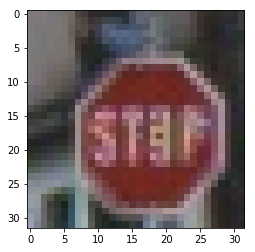

Label    : Stop 
Predicted: Stop


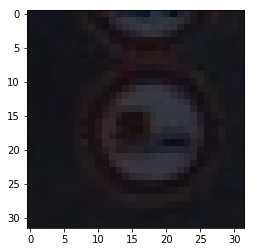

Label    : No passing for vehicles over 3.5 metric tons 
Predicted: No passing for vehicles over 3.5 metric tons


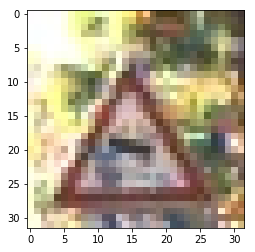

Label    : Slippery road 
Predicted: Slippery road


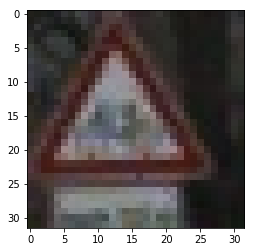

Label    : Bicycles crossing 
Predicted: Bicycles crossing


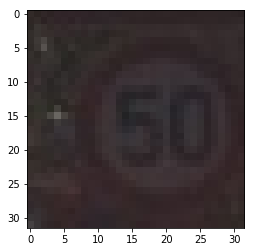

Label    : Speed limit (50km/h) 
Predicted: Speed limit (50km/h)


In [32]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

predicted = model.predict(X)
predicted_y = np.argmax(predicted, 1)
for i, (y, y_) in enumerate(zip(new_y, predicted_y)):
    plt.imshow(new_X[i])
    plt.show()
    print("Label    : {} \nPredicted: {}".format(label_names['SignName'][y], label_names['SignName'][y_]))

### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

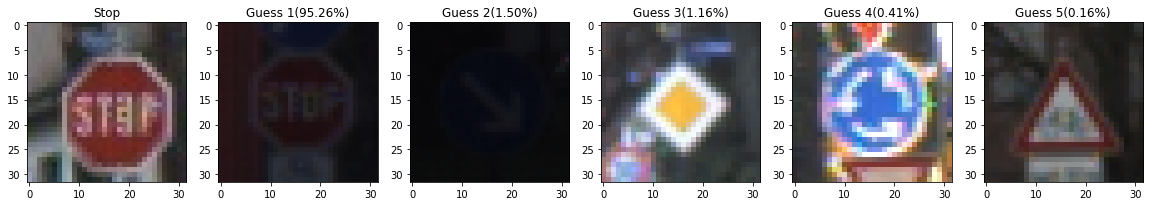

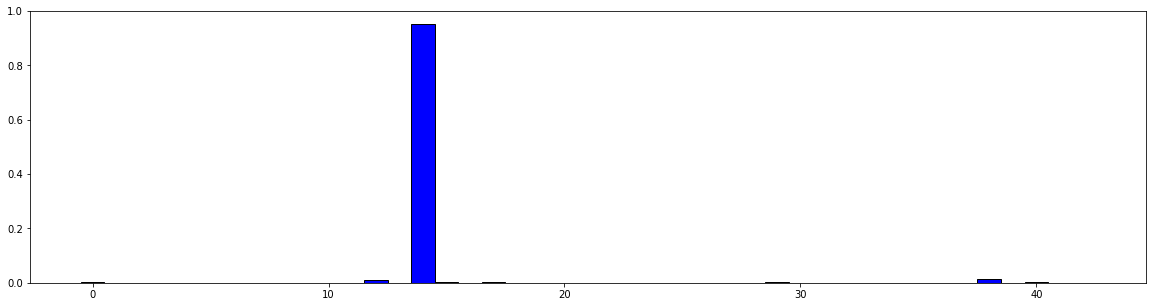

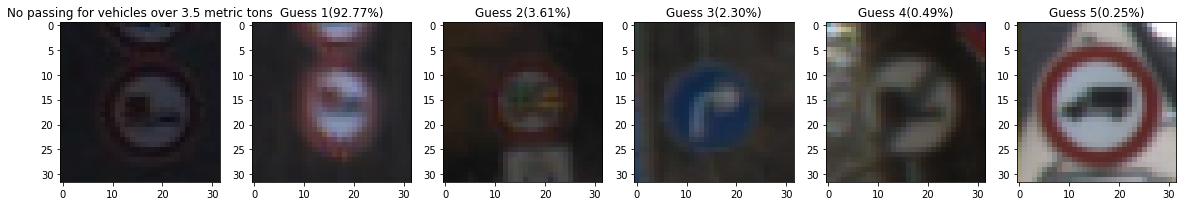

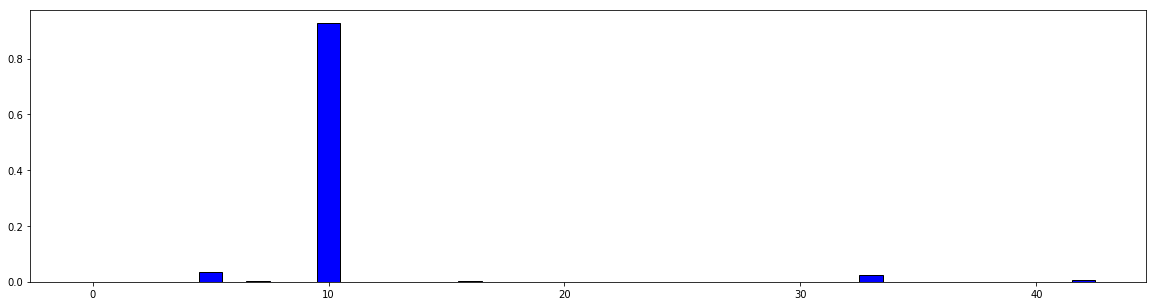

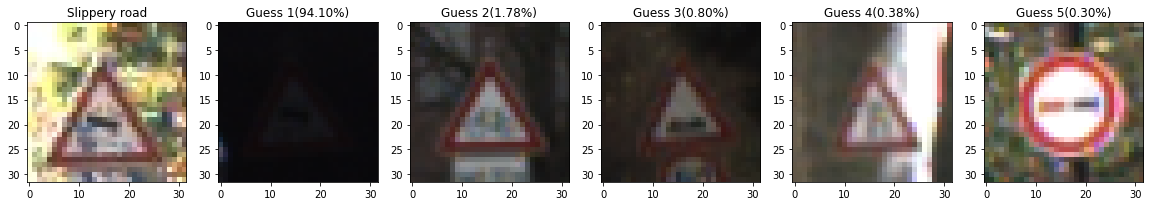

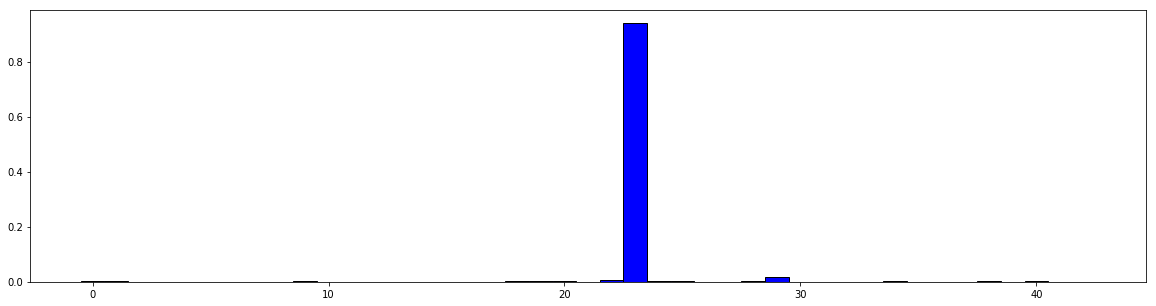

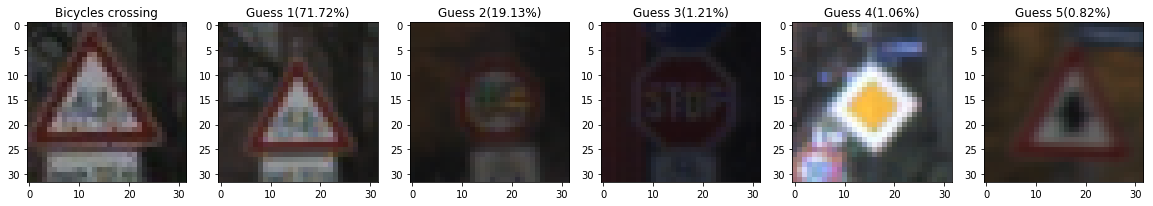

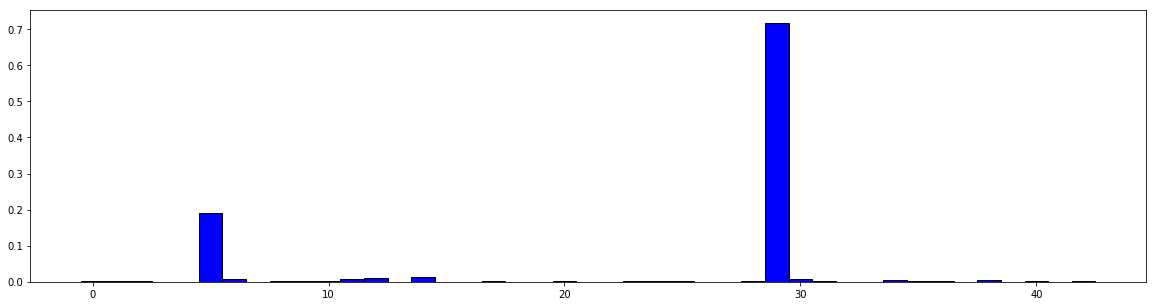

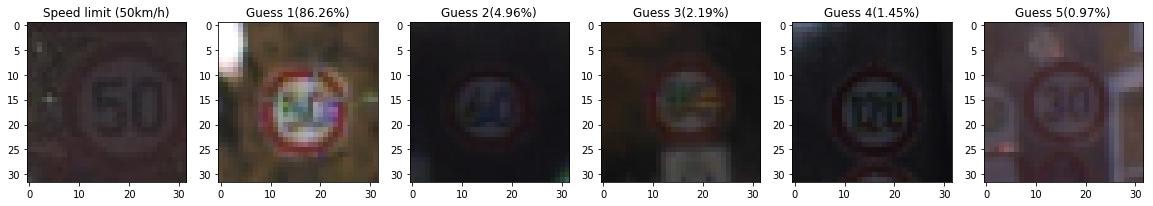

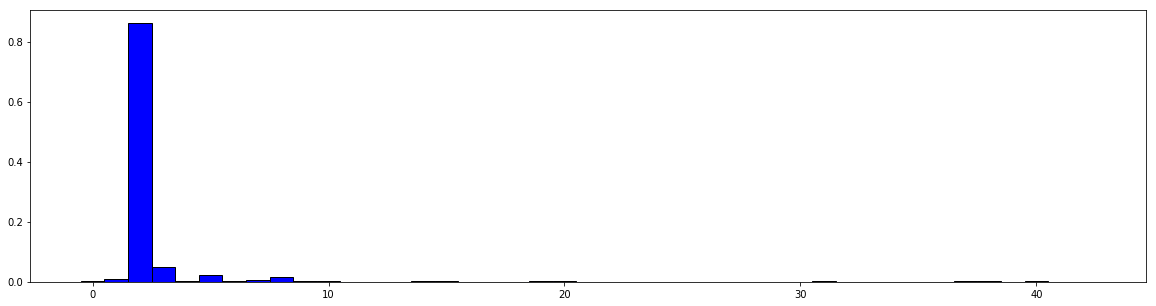

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for i, (logit, y_) in enumerate(zip(predicted, predicted_y)):
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    axs = axs.ravel()

    axs[0].set_title("{}".format(label_names['SignName'][y_]))
    axs[0].imshow(new_X[i])
    top5 = [(np.where(logit==score)[0][0], score) for score in sorted(logit)[-5:]]
    for i, item in enumerate(top5[::-1]):
        axs[1 + i].imshow(raw_X_train[group[item[0]][0]])
        axs[1 + i].set_title("Guess {}({:.2f}%)".format(1 + i, item[1] * 100.0))
    plt.show()
    fig = plt.figure(figsize=(20, 5))
    plt.bar(range(n_classes), logit, 1, color="blue", align='center', edgecolor='black')
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
import math

def outputFeatureMap(image_input, layer, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = model._sess.run(
        layer,
        feed_dict={
            model.holders['x']: [image_input],
            model.holders['keep_prob']: 1.0
        }
    )
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(math.ceil(featuremaps / 8), 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

### Visualize MyCNN

INFO:tensorflow:Restoring parameters from models/MyCNN-over-aug_dropout.ckpt


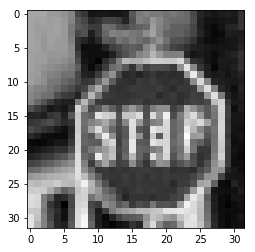

Conv1 1 - 16 channels


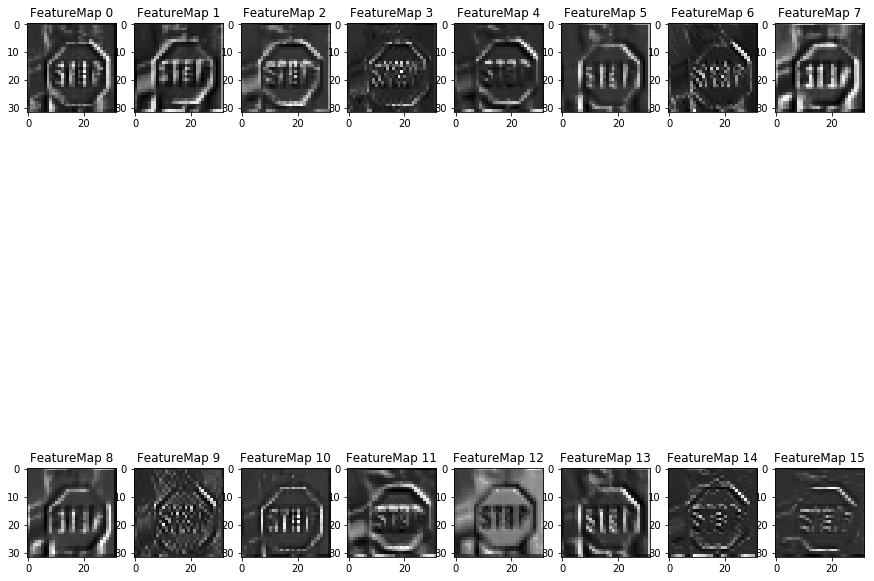

Conv2 16 - 16 channels


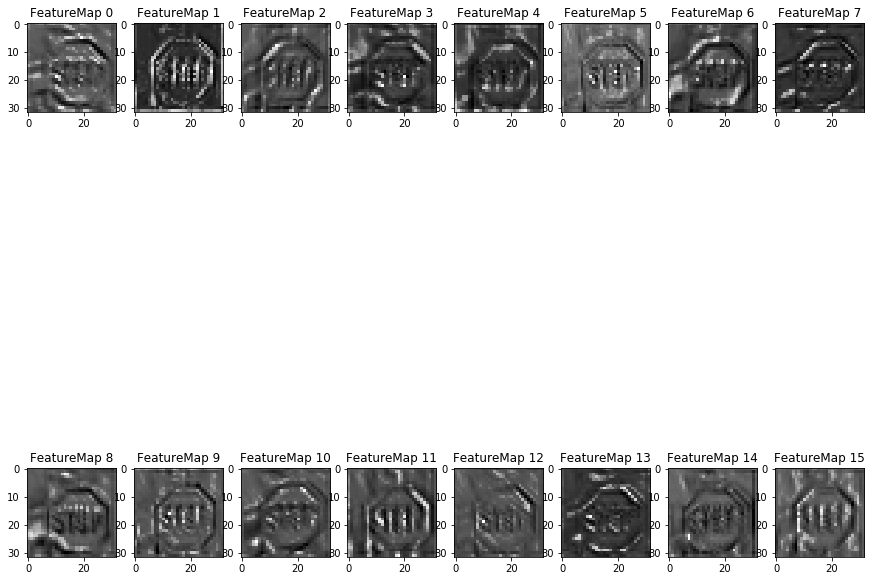

Conv3 Pool


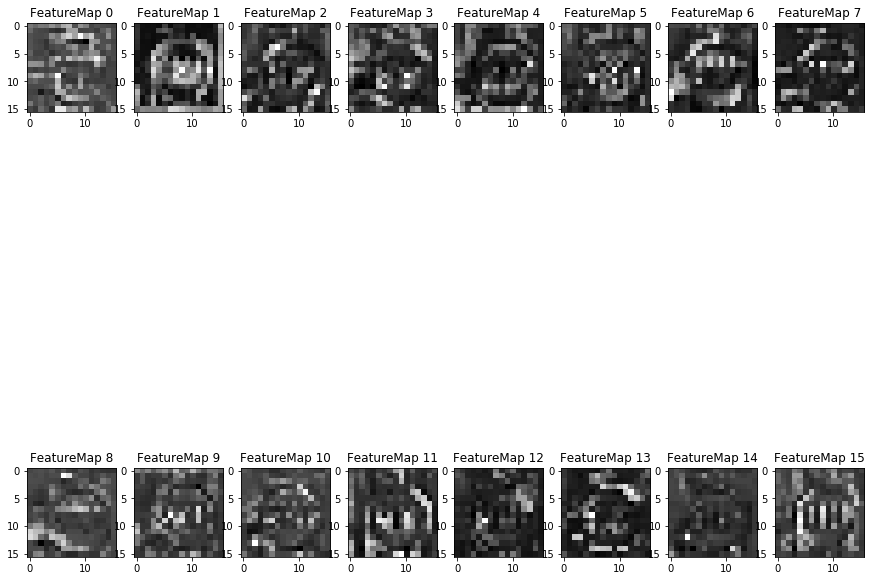

Conv4 16 - 32 channels


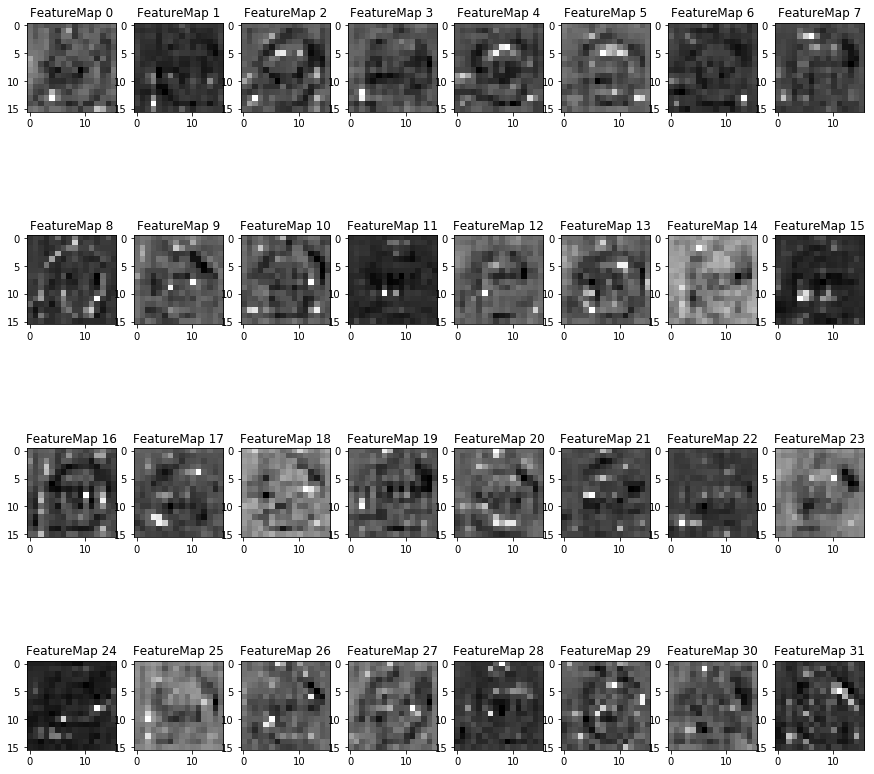

Conv5 Pool


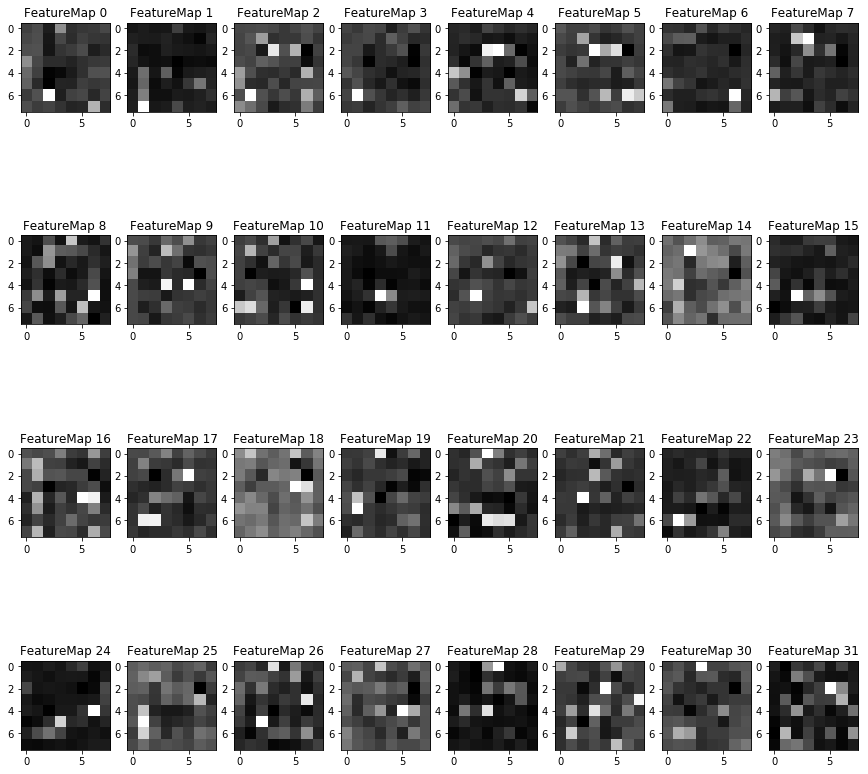

Conv6 32 - 64 channels


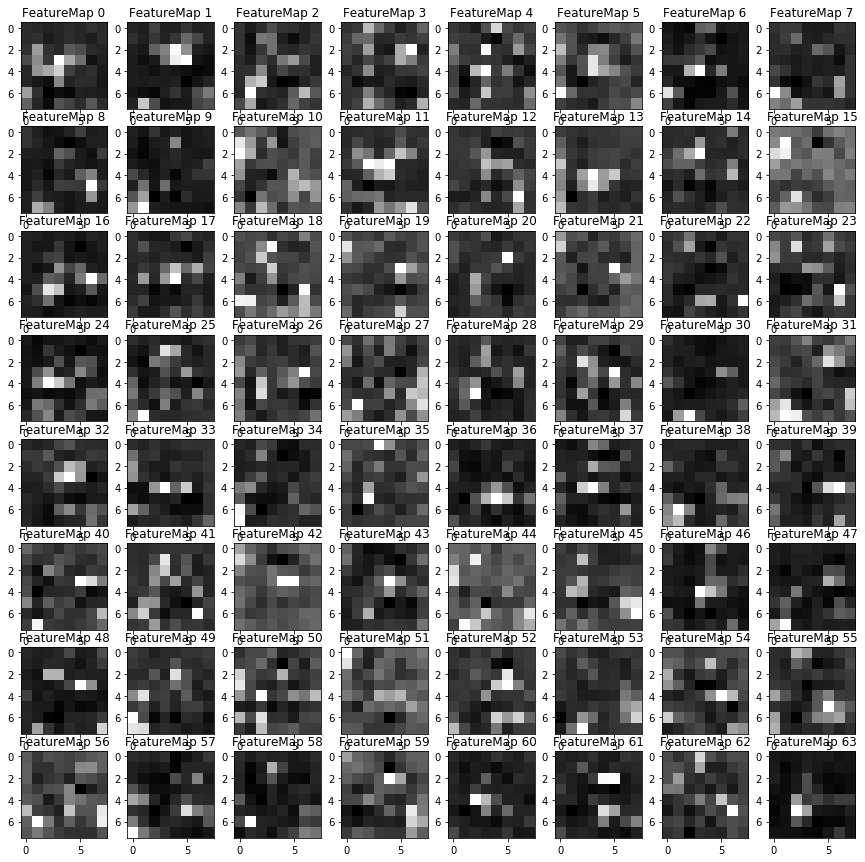

Conv7 Pool


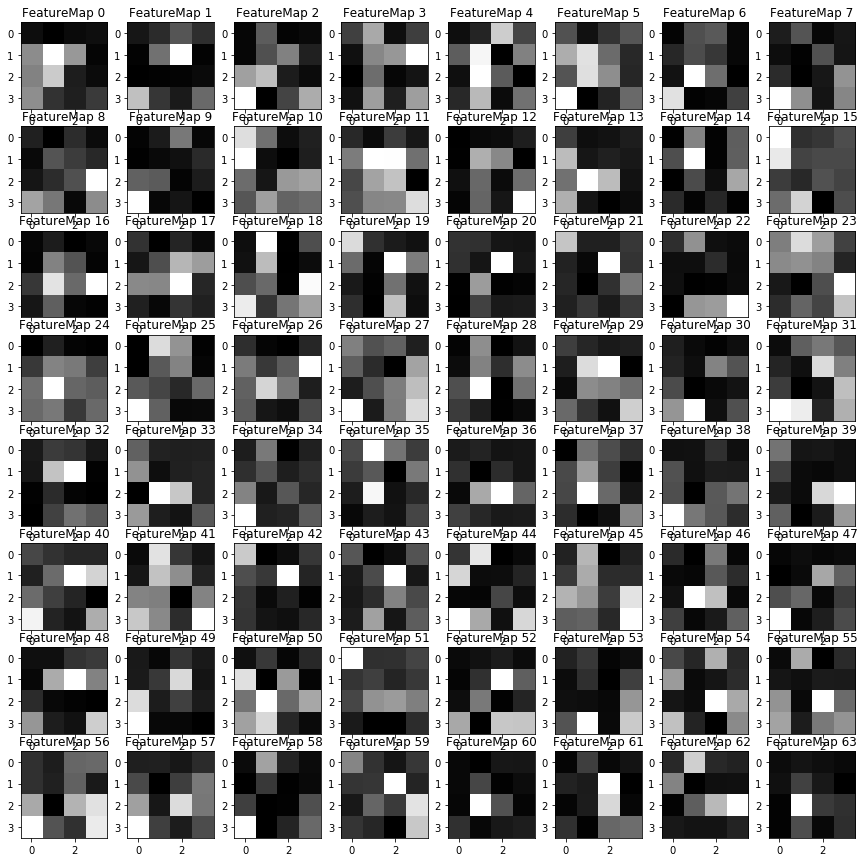

In [36]:
model = MyCNN([32, 32, 1], n_classes)
model.load('models/MyCNN-over-aug_dropout.ckpt')
gray_example = cv2.cvtColor(new_X[0], cv2.COLOR_RGB2GRAY).reshape([32, 32, 1])

plt.imshow(gray_example.reshape([32, 32]), cmap='gray')
plt.show()
print("Conv1 1 - 16 channels")
outputFeatureMap(gray_example, model.ops['conv1'])
print("Conv2 16 - 16 channels")
outputFeatureMap(gray_example, model.ops['conv2'])
print("Conv3 Pool")
outputFeatureMap(gray_example, model.ops['conv3'])
print("Conv4 16 - 32 channels")
outputFeatureMap(gray_example, model.ops['conv4'])
print("Conv5 Pool")
outputFeatureMap(gray_example, model.ops['conv5'])
print("Conv6 32 - 64 channels")
outputFeatureMap(gray_example, model.ops['conv6'])
print("Conv7 Pool")
outputFeatureMap(gray_example, model.ops['conv7'])

### Visualize LeNet5

INFO:tensorflow:Restoring parameters from models/LeNet5-over-aug_dropout.ckpt


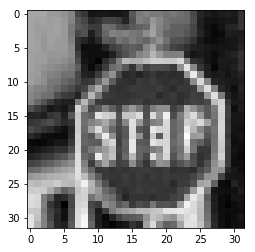

Conv1 1 - 16 channels


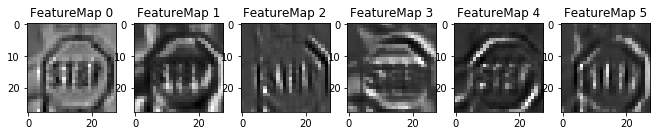

Conv2 16 - 16 channels


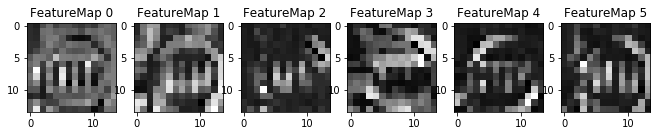

Conv3 Pool


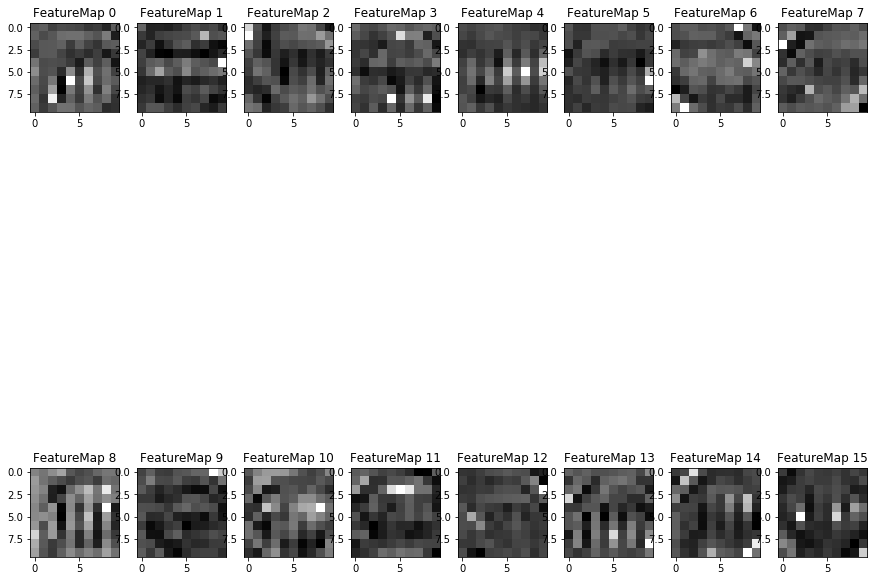

Conv4 16 - 32 channels


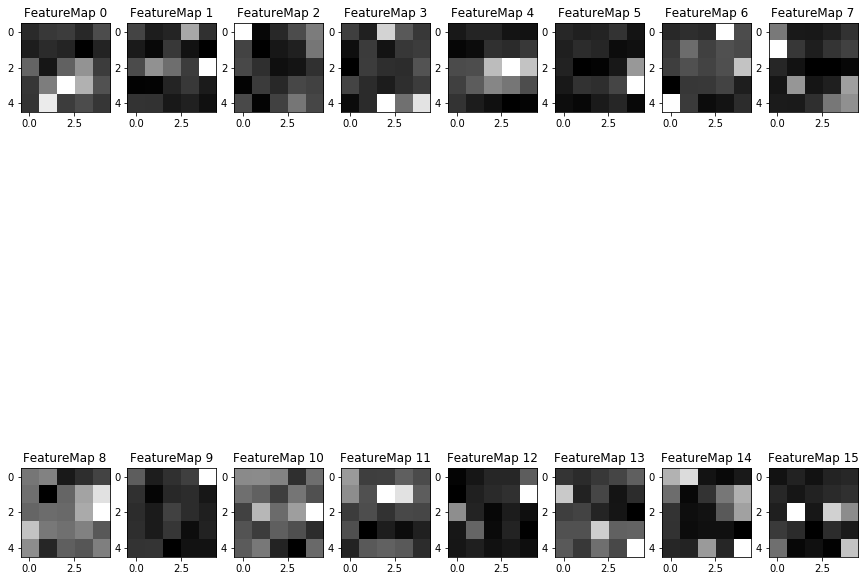

Conv5 Pool


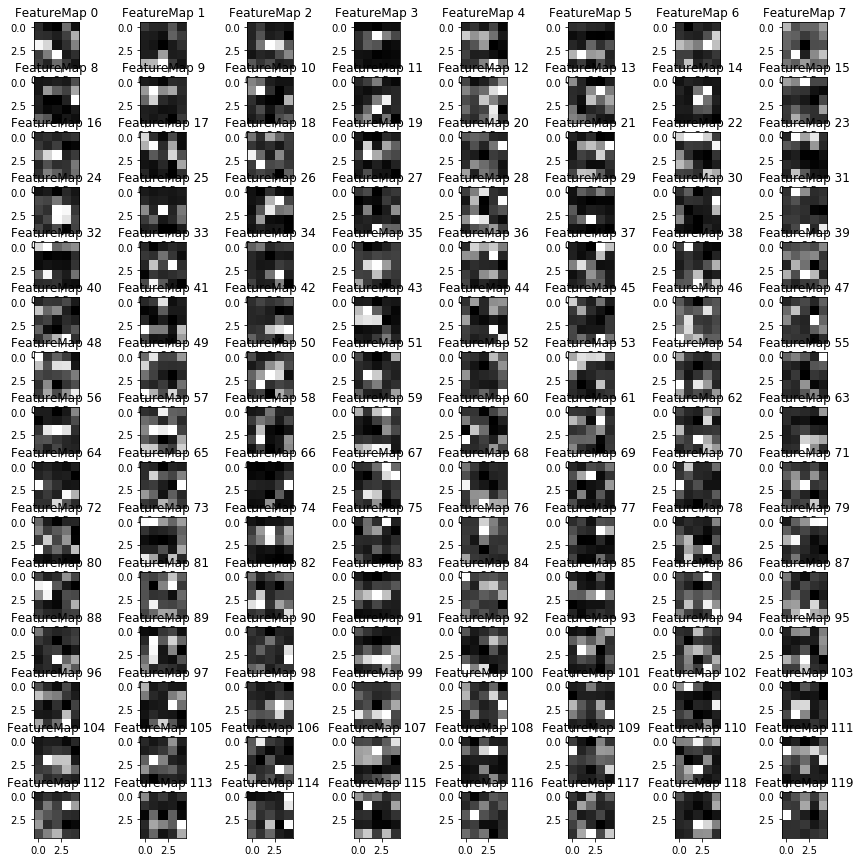

In [37]:
model = LeNet5([32, 32, 1], n_classes)
model.load('models/LeNet5-over-aug_dropout.ckpt')
gray_example = cv2.cvtColor(new_X[0], cv2.COLOR_RGB2GRAY).reshape([32, 32, 1])

plt.imshow(gray_example.reshape([32, 32]), cmap='gray')
plt.show()
print("Conv1 1 - 16 channels")
outputFeatureMap(gray_example, model.ops['conv1'])
print("Conv2 16 - 16 channels")
outputFeatureMap(gray_example, model.ops['conv2'])
print("Conv3 Pool")
outputFeatureMap(gray_example, model.ops['conv3'])
print("Conv4 16 - 32 channels")
outputFeatureMap(gray_example, model.ops['conv4'])
print("Conv5 Pool")
outputFeatureMap(gray_example, model.ops['conv5'])